In [90]:
# Import libraries necessary for this project

import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [91]:
interruption_df1 = pd.read_excel('JANUARY 2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df2 = pd.read_excel('FEBRUARY 2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df3 = pd.read_excel('MARCH 2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df4 = pd.read_excel('APRIL 2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df5 = pd.read_excel('MAY 2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df6 = pd.read_excel('JUNE 2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df7 = pd.read_excel('JULY 2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df8 = pd.read_excel('AUGUST 2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df9 = pd.read_excel('SEPTEMEBR 2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df10 = pd.read_excel('OCTOBER  2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df11 = pd.read_excel('NOVEMBER  2021 IBADAN REGION INTERRUPTION.xlsx')
interruption_df12 = pd.read_excel('DECEMBER  2021 IBADAN REGION INTERRUPTION.xlsx')

## Data Cleaning and Transformation of the Interruption Data

In this section, I will be cleaning and transforming the excel file.

In [92]:
# @title Default title text
## interruption data

interruption_df2.head(10)

,DAILY INTERRUPTIONS (OUTAGES) TO CUSTOMERS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,(e-mail: abdulhameed.nababa@ibedc.com),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IBADAN REGION,NaN,NaN,NaN,NaN,START EACH NEW DAY ON A FRESH SHEET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Date (For Carry Over Outa...,NaN,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),Remarks,NaN
3,33kV FEEDERS OUTAGES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-02 00:00:00,MOLETE,INTERCHANGE 33KV,1,EDC F/O,99,6,04:05:00,04:24:00,0.316667,14,492,NaN,155.8,"TRIPPED,TRIED AND STAYED",NaN
5,2021-01-02 00:00:00,MOLETE,EXPRESS 33KV,1,EDC F/O,99,6,05:38:00,05:56:00,0.3,10,1,NaN,0.3,"TRIPPED,TRIED AND STAYED",NaN
6,2021-01-02 00:00:00,MOLETE,EXPRESS 33KV,2,EDC F/O,99,6,08:06:00,08:13:00,0.116667,9,1,NaN,0.116667,"TRIPPED,TRIED AND STAYED",NaN
7,2021-01-02 00:00:00,MOLETE,EXPRESS 33KV,3,EDC F/O,99,6,08:19:00,11:50:00,3.516667,4,1,NaN,3.516667,NaN,NaN
8,2021-01-02 00:00:00,MOLETE,INDUSTRIAL 33KV,1,TCN L/S,1F,7,12:30:00,12:45:00,0.25,6,25,NaN,6.25,NaN,NaN
9,2021-01-02 00:00:00,MOLETE,INTERCHANGE 33KV,2,EDC F/O,99,"6,1",15:29:00,15:45:00,0.266667,14,492,NaN,131.2,NaN,NaN


In [93]:
# List of all your DataFrames
dataframes = [interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
              interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
              interruption_df11, interruption_df12]

# Loop through each DataFrame and drop the top 2 rows
for i, df in enumerate(dataframes):
    dataframes[i] = df.drop(df.index[:2])

# If you want to assign the modified DataFrames back to their original variables
[interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
 interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
 interruption_df11, interruption_df12] = dataframes


In [94]:
# List of all your DataFrames
dataframes = [interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
              interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
              interruption_df11, interruption_df12]

# Loop through each DataFrame, set the first row as header, and drop the first row
for i, df in enumerate(dataframes):
    new_header = df.iloc[0]  # grab the first row for the header
    df = df[1:]  # take the data less the header row
    df.columns = new_header  # set the header row as the df header
    dataframes[i] = df

# Reassign the modified DataFrames back to their original variables
[interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
 interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
 interruption_df11, interruption_df12] = dataframes


In [95]:
interruption_df1

2,Date (For Carry Over Outage Only),NaN,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),Remarks,NaN
3,33kV FEEDERS OUTAGES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,1,EDC F/O,99,"6,1",07:45:00,07:55:00,0.166667,2,25,NaN,4.166667,NaN,NaN
5,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,2,EDC F/O,99,"6,1",07:55:00,12:02:00,4.116667,NaN,25,NaN,102.916667,JUMPER RESTING ON POLE AMMENDED OPP BLACK HORSE,NaN
6,2021-01-01 00:00:00,MOLETE,EXPRESS 33KV,1,TCN L/S,1F,7,11:22:00,12:01:00,0.65,10,1,NaN,0.65,NaN,NaN
7,2021-01-01 00:00:00,MOLETE,INTERCHANGE 33KV,1,EDC F/O,99,6,14:49:00,15:16:00,0.45,12,492,NaN,221.4,"TRIPPED,TRIED AND STAYED",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,31/1/2021,APATA,OMI ADIO 33KV FDR,NaN,TCN/L/S,1F,7,00:00:00,00:20:00,0.333333,0MW,9634,9634,3211.333333,TCN TRANSFOMER LIMITATION,NaN
605,31/1/2021,APATA,OMI ADIO 33KV FDR,7,EDC/E/F,99,6,07:20:00,09:09:00,1.816667,5.8MW,9634,9634,17501.766667,EDC TRANSCIENT FAULT,NaN
606,31/1/2021,APATA,OMI ADIO 33KV FDR,9,TCN/L/S,1F,7,11:05:00,19:08:00,8.05,4.2MW,9634,9634,77553.7,TCN TRANSFOMER LIMITATION,NaN
607,31/1/2021,APATA,APATA 33KV,12,EDC/F/O,1F,1,16:10:00,17:30:00,1.333333,12MW,117,117,156,REPORT OF HEAVY SPARKING AT SHARP CORNER AREA ...,NaN


In [96]:
# List of all your DataFrames
dataframes = [interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
              interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
              interruption_df11, interruption_df12]

# Loop through each DataFrame and drop the top row
for i, df in enumerate(dataframes):
    dataframes[i] = df.iloc[1:]  # Drop the first row

# Reassign the modified DataFrames back to their original variables
[interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
 interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
 interruption_df11, interruption_df12] = dataframes


In [97]:
interruption_df1

2,Date (For Carry Over Outage Only),NaN,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),Remarks,NaN
4,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,1,EDC F/O,99,"6,1",07:45:00,07:55:00,0.166667,2,25,NaN,4.166667,NaN,NaN
5,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,2,EDC F/O,99,"6,1",07:55:00,12:02:00,4.116667,NaN,25,NaN,102.916667,JUMPER RESTING ON POLE AMMENDED OPP BLACK HORSE,NaN
6,2021-01-01 00:00:00,MOLETE,EXPRESS 33KV,1,TCN L/S,1F,7,11:22:00,12:01:00,0.65,10,1,NaN,0.65,NaN,NaN
7,2021-01-01 00:00:00,MOLETE,INTERCHANGE 33KV,1,EDC F/O,99,6,14:49:00,15:16:00,0.45,12,492,NaN,221.4,"TRIPPED,TRIED AND STAYED",NaN
8,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,3,EDC F/O,99,1,16:52:00,17:41:00,0.816667,3,25,NaN,20.416667,"TRIPPED,TRIED AND STAYED",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,31/1/2021,APATA,OMI ADIO 33KV FDR,NaN,TCN/L/S,1F,7,00:00:00,00:20:00,0.333333,0MW,9634,9634,3211.333333,TCN TRANSFOMER LIMITATION,NaN
605,31/1/2021,APATA,OMI ADIO 33KV FDR,7,EDC/E/F,99,6,07:20:00,09:09:00,1.816667,5.8MW,9634,9634,17501.766667,EDC TRANSCIENT FAULT,NaN
606,31/1/2021,APATA,OMI ADIO 33KV FDR,9,TCN/L/S,1F,7,11:05:00,19:08:00,8.05,4.2MW,9634,9634,77553.7,TCN TRANSFOMER LIMITATION,NaN
607,31/1/2021,APATA,APATA 33KV,12,EDC/F/O,1F,1,16:10:00,17:30:00,1.333333,12MW,117,117,156,REPORT OF HEAVY SPARKING AT SHARP CORNER AREA ...,NaN


In [98]:
# List of all your DataFrames
dataframes = [interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
              interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
              interruption_df11, interruption_df12]

# Loop through each DataFrame and rename the 'date' column to 'Date'
for i, df in enumerate(dataframes):
    dataframes[i] = df.rename(columns={dataframes[i].columns[0]: 'Date'}, inplace = True)


In [99]:
interruption_df1

2,Date,NaN,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),Remarks,NaN
4,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,1,EDC F/O,99,"6,1",07:45:00,07:55:00,0.166667,2,25,NaN,4.166667,NaN,NaN
5,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,2,EDC F/O,99,"6,1",07:55:00,12:02:00,4.116667,NaN,25,NaN,102.916667,JUMPER RESTING ON POLE AMMENDED OPP BLACK HORSE,NaN
6,2021-01-01 00:00:00,MOLETE,EXPRESS 33KV,1,TCN L/S,1F,7,11:22:00,12:01:00,0.65,10,1,NaN,0.65,NaN,NaN
7,2021-01-01 00:00:00,MOLETE,INTERCHANGE 33KV,1,EDC F/O,99,6,14:49:00,15:16:00,0.45,12,492,NaN,221.4,"TRIPPED,TRIED AND STAYED",NaN
8,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,3,EDC F/O,99,1,16:52:00,17:41:00,0.816667,3,25,NaN,20.416667,"TRIPPED,TRIED AND STAYED",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,31/1/2021,APATA,OMI ADIO 33KV FDR,NaN,TCN/L/S,1F,7,00:00:00,00:20:00,0.333333,0MW,9634,9634,3211.333333,TCN TRANSFOMER LIMITATION,NaN
605,31/1/2021,APATA,OMI ADIO 33KV FDR,7,EDC/E/F,99,6,07:20:00,09:09:00,1.816667,5.8MW,9634,9634,17501.766667,EDC TRANSCIENT FAULT,NaN
606,31/1/2021,APATA,OMI ADIO 33KV FDR,9,TCN/L/S,1F,7,11:05:00,19:08:00,8.05,4.2MW,9634,9634,77553.7,TCN TRANSFOMER LIMITATION,NaN
607,31/1/2021,APATA,APATA 33KV,12,EDC/F/O,1F,1,16:10:00,17:30:00,1.333333,12MW,117,117,156,REPORT OF HEAVY SPARKING AT SHARP CORNER AREA ...,NaN


In [100]:
interruption_df11.columns

Index([                             'Date',
                                       nan,
                 'Name of Affected Feeder',
                                'Event No',
                          'Type of Outage',
                  'Nature/Cause of Outage',
                            'Relay Target',
                              'Start Time',
                           'Time Restored',
                        'Duration (Hours)',
                          'LOAD LOSS (MW)',
                'No of Customers restored',
                  'Total Customers Served',
       'Customer-Hours Interruption (CHI)',
                                'Remarks ',
                                       nan],
      dtype='object', name=2)

In [101]:
# List of all your DataFrames
dataframes = [interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
              interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
              interruption_df11, interruption_df12]

# Loop through each DataFrame and rename the 'date' column to 'Date'
for i, df in enumerate(dataframes):
    dataframes[i] = df.rename(columns={dataframes[i].columns[1]: 'Location'}, inplace = True)

In [102]:
interruption_df1

2,Date,Location,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),Remarks,NaN
4,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,1,EDC F/O,99,"6,1",07:45:00,07:55:00,0.166667,2,25,NaN,4.166667,NaN,NaN
5,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,2,EDC F/O,99,"6,1",07:55:00,12:02:00,4.116667,NaN,25,NaN,102.916667,JUMPER RESTING ON POLE AMMENDED OPP BLACK HORSE,NaN
6,2021-01-01 00:00:00,MOLETE,EXPRESS 33KV,1,TCN L/S,1F,7,11:22:00,12:01:00,0.65,10,1,NaN,0.65,NaN,NaN
7,2021-01-01 00:00:00,MOLETE,INTERCHANGE 33KV,1,EDC F/O,99,6,14:49:00,15:16:00,0.45,12,492,NaN,221.4,"TRIPPED,TRIED AND STAYED",NaN
8,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,3,EDC F/O,99,1,16:52:00,17:41:00,0.816667,3,25,NaN,20.416667,"TRIPPED,TRIED AND STAYED",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,31/1/2021,APATA,OMI ADIO 33KV FDR,NaN,TCN/L/S,1F,7,00:00:00,00:20:00,0.333333,0MW,9634,9634,3211.333333,TCN TRANSFOMER LIMITATION,NaN
605,31/1/2021,APATA,OMI ADIO 33KV FDR,7,EDC/E/F,99,6,07:20:00,09:09:00,1.816667,5.8MW,9634,9634,17501.766667,EDC TRANSCIENT FAULT,NaN
606,31/1/2021,APATA,OMI ADIO 33KV FDR,9,TCN/L/S,1F,7,11:05:00,19:08:00,8.05,4.2MW,9634,9634,77553.7,TCN TRANSFOMER LIMITATION,NaN
607,31/1/2021,APATA,APATA 33KV,12,EDC/F/O,1F,1,16:10:00,17:30:00,1.333333,12MW,117,117,156,REPORT OF HEAVY SPARKING AT SHARP CORNER AREA ...,NaN


In [103]:
interruption_df11

2,Date,Location,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),Remarks,NaN
4,2021-01-11 00:00:00,MOLETE,INDUSTRIAL 33KV,NaN,EDC F/O,99,1,00:00:00,15:54:00,15.9,4,25,NaN,397.5,TRACING WITH NOTHING FOUND WHILE AJANLA FARM ...,NaN
5,2021-01-11 00:00:00,MOLETE,EXPRESS 33KV,1,EDC F/O,99,6,05:34:00,15:52:00,10.3,5,1,NaN,10.3,APPROACHING CLIMBERS CUT AT ADEOYO AREA.,NaN
6,2021-01-11 00:00:00,MOLETE,INTERCHANGE 33KV,1,EDC F/O,99,1,08:03:00,08:25:00,0.366667,14,492,NaN,180.4,"INTERTRIPPED BY ROOM 33KV FEEDER ,TRIED AND ST...",NaN
7,2021-01-11 00:00:00,MOLETE,INTERCHANGE 33KV,2,EDC F/O,99,"6,1",09:17:00,09:35:00,0.3,11,492,NaN,147.6,"TRIPPED,TRIED AND STAYED.",NaN
8,2021-01-11 00:00:00,MOLETE,INTERCHANGE 33KV,3,EDC F/O,99,1,09:37:00,17:13:00,7.6,1,492,NaN,3739.2,TRACING WITH NOTHING FOUND WHILE AVIANS LEG OP...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,30/11/2021,APATA,ERUWA TOWN 33KV FDR,13,EDC/F/O,1F,1,15:54:00,23:59:00,8.083333,0,0,0,0,EDC FORCED OUTAGE,NaN
720,30/11/2021,APATA,APATA 33KV FDR,14,EDC/O/C,99,6,16:37:00,16:51:00,0.233333,10,117,117,27.3,EDC TRANSCIENT FAULT,NaN
721,30/11/2021,APATA,OMI ADIO 33KV FDR,17,TCN/L/S,1F,7,20:13:00,22:23:00,2.166667,9.9,9634,9634,20873.666667,TCN TRANSFOMER LIMITATION,NaN
722,30/11/2021,APATA,ERUWA/LANLATE 33KV FDR,19,EDC/E/F,9,6,20:41:00,20:49:00,0.133333,5,4010,4010,534.666667,DUE TO TRIPPING ON ERUWA TOWN 33KV FDR,NaN


In [104]:
# List of all your DataFrames
dataframes = [interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
              interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
              interruption_df11, interruption_df12]

# Loop through each DataFrame and remove columns where all values are NaN
for i, df in enumerate(dataframes):
    dataframes[i] = df.dropna(axis=1, how='all')

# Reassign the modified DataFrames back to their original variables
[interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
 interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
 interruption_df11, interruption_df12] = dataframes


In [105]:
interruption_df1.shape

(605, 15)

In [106]:
interruption_df1

2,Date,Location,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),Remarks
4,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,1,EDC F/O,99,"6,1",07:45:00,07:55:00,0.166667,2,25,NaN,4.166667,NaN
5,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,2,EDC F/O,99,"6,1",07:55:00,12:02:00,4.116667,NaN,25,NaN,102.916667,JUMPER RESTING ON POLE AMMENDED OPP BLACK HORSE
6,2021-01-01 00:00:00,MOLETE,EXPRESS 33KV,1,TCN L/S,1F,7,11:22:00,12:01:00,0.65,10,1,NaN,0.65,NaN
7,2021-01-01 00:00:00,MOLETE,INTERCHANGE 33KV,1,EDC F/O,99,6,14:49:00,15:16:00,0.45,12,492,NaN,221.4,"TRIPPED,TRIED AND STAYED"
8,2021-01-01 00:00:00,MOLETE,INDUSTRIAL 33KV,3,EDC F/O,99,1,16:52:00,17:41:00,0.816667,3,25,NaN,20.416667,"TRIPPED,TRIED AND STAYED"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,31/1/2021,APATA,OMI ADIO 33KV FDR,NaN,TCN/L/S,1F,7,00:00:00,00:20:00,0.333333,0MW,9634,9634,3211.333333,TCN TRANSFOMER LIMITATION
605,31/1/2021,APATA,OMI ADIO 33KV FDR,7,EDC/E/F,99,6,07:20:00,09:09:00,1.816667,5.8MW,9634,9634,17501.766667,EDC TRANSCIENT FAULT
606,31/1/2021,APATA,OMI ADIO 33KV FDR,9,TCN/L/S,1F,7,11:05:00,19:08:00,8.05,4.2MW,9634,9634,77553.7,TCN TRANSFOMER LIMITATION
607,31/1/2021,APATA,APATA 33KV,12,EDC/F/O,1F,1,16:10:00,17:30:00,1.333333,12MW,117,117,156,REPORT OF HEAVY SPARKING AT SHARP CORNER AREA ...


In [107]:
interruption_df1.dtypes

2
Date                                 object
Location                             object
Name of Affected Feeder              object
Event No                             object
Type of Outage                       object
Nature/Cause of Outage               object
Relay Target                         object
Start Time                           object
Time Restored                        object
Duration (Hours)                     object
LOAD LOSS (MW)                       object
No of Customers restored             object
Total Customers Served               object
Customer-Hours Interruption (CHI)    object
Remarks                              object
dtype: object

In [108]:
# List of all your DataFrames
dataframes = [interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
              interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
              interruption_df11, interruption_df12]

# Loop through each DataFrame and convert the 'Date' column
for df in dataframes:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Now each DataFrame has the 'Date' column in datetime format


In [109]:
interruption_df1

2,Date,Location,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),Remarks
4,2021-01-01,MOLETE,INDUSTRIAL 33KV,1,EDC F/O,99,"6,1",07:45:00,07:55:00,0.166667,2,25,NaN,4.166667,NaN
5,2021-01-01,MOLETE,INDUSTRIAL 33KV,2,EDC F/O,99,"6,1",07:55:00,12:02:00,4.116667,NaN,25,NaN,102.916667,JUMPER RESTING ON POLE AMMENDED OPP BLACK HORSE
6,2021-01-01,MOLETE,EXPRESS 33KV,1,TCN L/S,1F,7,11:22:00,12:01:00,0.65,10,1,NaN,0.65,NaN
7,2021-01-01,MOLETE,INTERCHANGE 33KV,1,EDC F/O,99,6,14:49:00,15:16:00,0.45,12,492,NaN,221.4,"TRIPPED,TRIED AND STAYED"
8,2021-01-01,MOLETE,INDUSTRIAL 33KV,3,EDC F/O,99,1,16:52:00,17:41:00,0.816667,3,25,NaN,20.416667,"TRIPPED,TRIED AND STAYED"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,2021-01-31,APATA,OMI ADIO 33KV FDR,NaN,TCN/L/S,1F,7,00:00:00,00:20:00,0.333333,0MW,9634,9634,3211.333333,TCN TRANSFOMER LIMITATION
605,2021-01-31,APATA,OMI ADIO 33KV FDR,7,EDC/E/F,99,6,07:20:00,09:09:00,1.816667,5.8MW,9634,9634,17501.766667,EDC TRANSCIENT FAULT
606,2021-01-31,APATA,OMI ADIO 33KV FDR,9,TCN/L/S,1F,7,11:05:00,19:08:00,8.05,4.2MW,9634,9634,77553.7,TCN TRANSFOMER LIMITATION
607,2021-01-31,APATA,APATA 33KV,12,EDC/F/O,1F,1,16:10:00,17:30:00,1.333333,12MW,117,117,156,REPORT OF HEAVY SPARKING AT SHARP CORNER AREA ...


In [110]:
interruption_df1.dtypes

2
Date                                 datetime64[ns]
Location                                     object
Name of Affected Feeder                      object
Event No                                     object
Type of Outage                               object
Nature/Cause of Outage                       object
Relay Target                                 object
Start Time                                   object
Time Restored                                object
Duration (Hours)                             object
LOAD LOSS (MW)                               object
No of Customers restored                     object
Total Customers Served                       object
Customer-Hours Interruption (CHI)            object
Remarks                                      object
dtype: object

In [111]:
interruption_df11.columns

Index(['Date', 'Location', 'Name of Affected Feeder', 'Event No',
       'Type of Outage', 'Nature/Cause of Outage', 'Relay Target',
       'Start Time', 'Time Restored', 'Duration (Hours)', 'LOAD LOSS (MW)',
       'No of Customers restored', 'Total Customers Served',
       'Customer-Hours Interruption (CHI)', 'Remarks '],
      dtype='object', name=2)

In [112]:
# List of all your DataFrames
dataframes = [interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
              interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
              interruption_df11, interruption_df12]

# Dictionary to hold the number of columns for each DataFrame
num_columns = {}

# Loop through each DataFrame and get the number of columns
for i, df in enumerate(dataframes, start=1):
    num_columns[f'interruption_df{i}'] = df.shape[1]

# num_columns now contains the number of columns for each DataFrame
num_columns


{'interruption_df1': 15,
 'interruption_df2': 15,
 'interruption_df3': 15,
 'interruption_df4': 15,
 'interruption_df5': 15,
 'interruption_df6': 15,
 'interruption_df7': 15,
 'interruption_df8': 15,
 'interruption_df9': 15,
 'interruption_df10': 15,
 'interruption_df11': 15,
 'interruption_df12': 15}

In [113]:
import pandas as pd

# List of all your DataFrames
dataframes = [interruption_df1, interruption_df2, interruption_df3, interruption_df4, interruption_df5,
              interruption_df6, interruption_df7, interruption_df8, interruption_df9, interruption_df10,
              interruption_df11, interruption_df12]

# Concatenate all DataFrames
concatenated_df = pd.concat(dataframes, axis=0, ignore_index=True)

# 'concatenated_df' is now a single DataFrame containing all the data




In [114]:
concatenated_df

2,Date,Location,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),Remarks
0,2021-01-01,MOLETE,INDUSTRIAL 33KV,1,EDC F/O,99,"6,1",07:45:00,07:55:00,0.166667,2,25,NaN,4.166667,NaN
1,2021-01-01,MOLETE,INDUSTRIAL 33KV,2,EDC F/O,99,"6,1",07:55:00,12:02:00,4.116667,NaN,25,NaN,102.916667,JUMPER RESTING ON POLE AMMENDED OPP BLACK HORSE
2,2021-01-01,MOLETE,EXPRESS 33KV,1,TCN L/S,1F,7,11:22:00,12:01:00,0.65,10,1,NaN,0.65,NaN
3,2021-01-01,MOLETE,INTERCHANGE 33KV,1,EDC F/O,99,6,14:49:00,15:16:00,0.45,12,492,NaN,221.4,"TRIPPED,TRIED AND STAYED"
4,2021-01-01,MOLETE,INDUSTRIAL 33KV,3,EDC F/O,99,1,16:52:00,17:41:00,0.816667,3,25,NaN,20.416667,"TRIPPED,TRIED AND STAYED"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,2021-12-29,DUGBE,T1 15MVA @ ELEYELE,1,EDC P/O,99,1,15:30:00,16:09:00,0.65,0.5,4160,4160,2704,TO ENABLE REGIONAL FILTERS ARREST OIL LEAKAGE ...
7758,2021-12-29,DUGBE,IYAGANKU 33KV,2,EDC F/O,99,6,16:14:00,17:41:00,1.45,3,5,5,7.25,TRIPPED ON O/C R&Y
7759,2021-12-29,DUGBE,APETE 33KV,2,EDC L/S,1F,7,17:05:00,23:59:00,0,7,0,0,0,NaN
7760,2021-12-29,DUGBE,IYAGANKU 33KV,3,EDC F/O,1F,7,21:11:00,22:53:00,1.7,3,5,5,8.5,TRIPPED ON O/C R&Y


In [115]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7762 entries, 0 to 7761
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               7710 non-null   datetime64[ns]
 1   Location                           7762 non-null   object        
 2   Name of Affected Feeder            7759 non-null   object        
 3   Event No                           7148 non-null   object        
 4   Type of Outage                     7762 non-null   object        
 5   Nature/Cause of Outage             7737 non-null   object        
 6   Relay Target                       7761 non-null   object        
 7   Start Time                         7759 non-null   object        
 8   Time Restored                      7758 non-null   object        
 9   Duration (Hours)                   7760 non-null   object        
 10  LOAD LOSS (MW)                     7

In [116]:
concatenated_df['Event No'].unique()


array([1, 2, 3, nan, 4, 8, 10, 11, 16, 7, 5, 6, 9, 12, 15, 14, 13, 17, 18,
       20, 22, 19, 21, 23, 24, 25, 0, 'I'], dtype=object)

In [117]:
def drop(df):
    # Identify columns where more than 30% of the values are null
    cols_to_drop = [col for col in df.columns if (df[col].isnull().sum() / len(df)) * 100 > 30]

    # Drop these columns
    df.drop(cols_to_drop, axis=1, inplace=True)

    # Drop rows where any value is NaN
    df.dropna(inplace=True)


In [118]:
drop(concatenated_df)

In [119]:
concatenated_df

2,Date,Location,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Customer-Hours Interruption (CHI)
0,2021-01-01,MOLETE,INDUSTRIAL 33KV,1,EDC F/O,99,"6,1",07:45:00,07:55:00,0.166667,2,25,4.166667
2,2021-01-01,MOLETE,EXPRESS 33KV,1,TCN L/S,1F,7,11:22:00,12:01:00,0.65,10,1,0.65
3,2021-01-01,MOLETE,INTERCHANGE 33KV,1,EDC F/O,99,6,14:49:00,15:16:00,0.45,12,492,221.4
4,2021-01-01,MOLETE,INDUSTRIAL 33KV,3,EDC F/O,99,1,16:52:00,17:41:00,0.816667,3,25,20.416667
5,2021-01-01,MOLETE,ROM 33KV,1,EDC F/O,99,6,14:49:00,15:23:00,0.566667,6,14,7.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,2021-12-29,DUGBE,T1 15MVA @ ELEYELE,1,EDC P/O,99,1,15:30:00,16:09:00,0.65,0.5,4160,2704
7758,2021-12-29,DUGBE,IYAGANKU 33KV,2,EDC F/O,99,6,16:14:00,17:41:00,1.45,3,5,7.25
7759,2021-12-29,DUGBE,APETE 33KV,2,EDC L/S,1F,7,17:05:00,23:59:00,0,7,0,0
7760,2021-12-29,DUGBE,IYAGANKU 33KV,3,EDC F/O,1F,7,21:11:00,22:53:00,1.7,3,5,8.5


In [120]:
import re

# Apply regex substitution to extract only numbers from the 'Load(MW)' column
concatenated_df['LOAD LOSS (MW)'] = concatenated_df['LOAD LOSS (MW)'].apply(lambda x: re.sub('[^0-9]', '', str(x)))

In [121]:
# Attempting to read the 'LOAD LOSS (MW)' column and convert it to a numerical column

try:

    # Check if the 'LOAD LOSS (MW)' column exists
    if 'LOAD LOSS (MW)' in concatenated_df.columns:
        # Extracting the column and converting it to numeric, errors are coerced to NaN
        concatenated_df['LOAD LOSS (MW)'] = pd.to_numeric(concatenated_df['LOAD LOSS (MW)'], errors='coerce')
    else:
        concatenated_df['LOAD LOSS (MW)'] = "Column 'LOAD LOSS (MW)' not found in the dataset."
except Exception as e:
    concatenated_df['LOAD LOSS (MW)'] = f"An error occurred while reading the file: {str(e)}"

concatenated_df['LOAD LOSS (MW)']



0        2
2       10
3       12
4        3
5        6
        ..
7757     5
7758     3
7759     7
7760     3
7761     7
Name: LOAD LOSS (MW), Length: 6613, dtype: int64

In [122]:
# Attempting to read the 'Duration (Hours)' column and convert it to a numerical column

try:
    # Check if the 'Duration (Hours)' column exists
    if 'Duration (Hours)' in concatenated_df.columns:
        # Extracting the column and converting it to numeric, errors are coerced to NaN
        concatenated_df['Duration (Hours)'] = pd.to_numeric(concatenated_df['Duration (Hours)'], errors='coerce')
    else:
        concatenated_df['Duration (Hours)'] = "Column 'Duration (Hours)' not found in the dataset."
except Exception as e:
    concatenated_df['Duration (Hours)'] = f"An error occurred while reading the file: {str(e)}"

concatenated_df['Duration (Hours)']



0       0.166667
2       0.650000
3       0.450000
4       0.816667
5       0.566667
          ...   
7757    0.650000
7758    1.450000
7759    0.000000
7760    1.700000
7761    2.800000
Name: Duration (Hours), Length: 6613, dtype: float64

In [123]:
# Attempting to read the 'Duration (Hours)' column and convert it to a numerical column

try:
    # Check if the 'No of Customers restored' column exists
    if 'No of Customers restored' in concatenated_df.columns:
        # Extracting the column and converting it to numeric, errors are coerced to NaN
        concatenated_df['No of Customers restored'] = pd.to_numeric(concatenated_df['No of Customers restored'], errors='coerce')
    else:
        concatenated_df['No of Customers restored'] = "Column 'No of Customers restored' not found in the dataset."
except Exception as e:
    concatenated_df['No of Customers restored'] = f"An error occurred while reading the file: {str(e)}"

concatenated_df['No of Customers restored']



0         25.0
2          1.0
3        492.0
4         25.0
5         14.0
         ...  
7757    4160.0
7758       5.0
7759       0.0
7760       5.0
7761       0.0
Name: No of Customers restored, Length: 6613, dtype: float64

In [124]:
# Attempting to read the 'Customer-Hours Interruption (CHI)' column and convert it to a numerical column

try:
    # Check if the 'Customer-Hours Interruption (CHI)' column exists
    if 'Customer-Hours Interruption (CHI)' in concatenated_df.columns:
        # Extracting the column and converting it to numeric, errors are coerced to NaN
        concatenated_df['Customer-Hours Interruption (CHI)'] = pd.to_numeric(concatenated_df['Customer-Hours Interruption (CHI)'], errors='coerce')
    else:
        concatenated_df['Customer-Hours Interruption (CHI)'] = "Column 'Customer-Hours Interruption (CHI)' not found in the dataset."
except Exception as e:
    concatenated_df['Customer-Hours Interruption (CHI)'] = f"An error occurred while reading the file: {str(e)}"

concatenated_df['Customer-Hours Interruption (CHI)']



0          4.166667
2          0.650000
3        221.400000
4         20.416667
5          7.933333
           ...     
7757    2704.000000
7758       7.250000
7759       0.000000
7760       8.500000
7761       0.000000
Name: Customer-Hours Interruption (CHI), Length: 6613, dtype: float64

In [125]:
concatenated_df.dtypes

2
Date                                 datetime64[ns]
Location                                     object
Name of Affected Feeder                      object
Event No                                     object
Type of Outage                               object
Nature/Cause of Outage                       object
Relay Target                                 object
Start Time                                   object
Time Restored                                object
Duration (Hours)                            float64
LOAD LOSS (MW)                                int64
No of Customers restored                    float64
Customer-Hours Interruption (CHI)           float64
dtype: object

In [126]:
concatenated_df['Relay Target'].nunique()

27

In [127]:
concatenated_df['No of Customers restored'].values

array([ 25.,   1., 492., ...,   0.,   5.,   0.])

In [128]:
concatenated_df.to_csv('energy_data.csv', index = False)

In [129]:
concatenated_df['Start Time'] = pd.to_datetime(concatenated_df['Start Time'], format = '%H:%M:%S').dt.time

In [130]:
concatenated_df['Time Restored'].values

array([datetime.time(7, 55), datetime.time(12, 1), datetime.time(15, 16),
       ..., datetime.time(23, 59), datetime.time(22, 53),
       datetime.time(23, 59)], dtype=object)

In [131]:
concatenated_df['Event No'].unique()

array([1, 3, 2, 4, 8, 10, 11, 16, 7, 5, 6, 9, 12, 15, 14, 13, 17, 18, 20,
       22, 19, 21, 23, 24, 25, 0, 'I'], dtype=object)

In [132]:
concatenated_df['Event No'] = pd.to_numeric(concatenated_df['Event No'], errors='coerce')


In [133]:
concatenated_df.isnull().sum()

2
Date                                 0
Location                             0
Name of Affected Feeder              0
Event No                             1
Type of Outage                       0
Nature/Cause of Outage               0
Relay Target                         0
Start Time                           0
Time Restored                        0
Duration (Hours)                     2
LOAD LOSS (MW)                       0
No of Customers restored             1
Customer-Hours Interruption (CHI)    0
dtype: int64

In [134]:
drop(concatenated_df)

In [135]:
concatenated_df.dtypes

2
Date                                 datetime64[ns]
Location                                     object
Name of Affected Feeder                      object
Event No                                    float64
Type of Outage                               object
Nature/Cause of Outage                       object
Relay Target                                 object
Start Time                                   object
Time Restored                                object
Duration (Hours)                            float64
LOAD LOSS (MW)                                int64
No of Customers restored                    float64
Customer-Hours Interruption (CHI)           float64
dtype: object

In [136]:
concatenated_df

2,Date,Location,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Customer-Hours Interruption (CHI)
0,2021-01-01,MOLETE,INDUSTRIAL 33KV,1.0,EDC F/O,99,"6,1",07:45:00,07:55:00,0.166667,2,25.0,4.166667
2,2021-01-01,MOLETE,EXPRESS 33KV,1.0,TCN L/S,1F,7,11:22:00,12:01:00,0.650000,10,1.0,0.650000
3,2021-01-01,MOLETE,INTERCHANGE 33KV,1.0,EDC F/O,99,6,14:49:00,15:16:00,0.450000,12,492.0,221.400000
4,2021-01-01,MOLETE,INDUSTRIAL 33KV,3.0,EDC F/O,99,1,16:52:00,17:41:00,0.816667,3,25.0,20.416667
5,2021-01-01,MOLETE,ROM 33KV,1.0,EDC F/O,99,6,14:49:00,15:23:00,0.566667,6,14.0,7.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,2021-12-29,DUGBE,T1 15MVA @ ELEYELE,1.0,EDC P/O,99,1,15:30:00,16:09:00,0.650000,5,4160.0,2704.000000
7758,2021-12-29,DUGBE,IYAGANKU 33KV,2.0,EDC F/O,99,6,16:14:00,17:41:00,1.450000,3,5.0,7.250000
7759,2021-12-29,DUGBE,APETE 33KV,2.0,EDC L/S,1F,7,17:05:00,23:59:00,0.000000,7,0.0,0.000000
7760,2021-12-29,DUGBE,IYAGANKU 33KV,3.0,EDC F/O,1F,7,21:11:00,22:53:00,1.700000,3,5.0,8.500000


In [137]:
concatenated_df.describe()

2,Event No,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Customer-Hours Interruption (CHI)
count,6609.000000,6609.000000,6.609000e+03,6609.000000,6609.000000
mean,4.444999,3.579475,2.265152e+12,2471.595267,10866.825562
std,4.991007,4.862993,1.113009e+14,3619.880499,27426.552617
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,0.283333,5.000000e+00,6.000000,1.283333
50%,2.000000,1.216667,9.000000e+00,117.000000,81.900000
75%,7.000000,5.366667,2.100000e+01,4010.000000,3403.000000
max,25.000000,23.983333,6.284722e+15,9964.000000,223188.900000


In [138]:
concatenated_df.to_csv('concatenated_data.csv', index = False)

In [139]:
concatenated_df.drop('Location', axis = 1, inplace = True)

## Exploratory Data Analysis and Data Visualization


In [140]:
concatenated_df.columns

Index(['Date', 'Name of Affected Feeder', 'Event No', 'Type of Outage',
       'Nature/Cause of Outage', 'Relay Target', 'Start Time', 'Time Restored',
       'Duration (Hours)', 'LOAD LOSS (MW)', 'No of Customers restored',
       'Customer-Hours Interruption (CHI)'],
      dtype='object', name=2)

In [141]:
concatenated_df.duplicated().sum()

26

In [142]:
concatenated_df

2,Date,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Customer-Hours Interruption (CHI)
0,2021-01-01,INDUSTRIAL 33KV,1.0,EDC F/O,99,"6,1",07:45:00,07:55:00,0.166667,2,25.0,4.166667
2,2021-01-01,EXPRESS 33KV,1.0,TCN L/S,1F,7,11:22:00,12:01:00,0.650000,10,1.0,0.650000
3,2021-01-01,INTERCHANGE 33KV,1.0,EDC F/O,99,6,14:49:00,15:16:00,0.450000,12,492.0,221.400000
4,2021-01-01,INDUSTRIAL 33KV,3.0,EDC F/O,99,1,16:52:00,17:41:00,0.816667,3,25.0,20.416667
5,2021-01-01,ROM 33KV,1.0,EDC F/O,99,6,14:49:00,15:23:00,0.566667,6,14.0,7.933333
...,...,...,...,...,...,...,...,...,...,...,...,...
7757,2021-12-29,T1 15MVA @ ELEYELE,1.0,EDC P/O,99,1,15:30:00,16:09:00,0.650000,5,4160.0,2704.000000
7758,2021-12-29,IYAGANKU 33KV,2.0,EDC F/O,99,6,16:14:00,17:41:00,1.450000,3,5.0,7.250000
7759,2021-12-29,APETE 33KV,2.0,EDC L/S,1F,7,17:05:00,23:59:00,0.000000,7,0.0,0.000000
7760,2021-12-29,IYAGANKU 33KV,3.0,EDC F/O,1F,7,21:11:00,22:53:00,1.700000,3,5.0,8.500000


In [143]:
concatenated_df['Type of Outage'].replace({'EDC/E/F': 'EDC E/F', 'EDCF/O': 'EDC F/O', 'TCN/F/O': 'TCN F/O',
                                           'TCN/L/S': 'TCN L/S', 'EDC/F/O': 'EDC F/O', 'EDC/P/O': 'EDC P/O',
                                           'EDC/O/C': 'EDC O/C', 'TCN/L/S ': 'TCN L/S', 'EDC L/S ': 'EDC L/S',
                                           'TCN/P/O': 'TCN P/O', 'EDC /F/O': 'EDC F/O', 'TCN L./S': 'TCN L/S',
                                           'EDC /E/F': 'EDC E/F', 'EDC /O/C': 'EDC O/C', 'EDC/FO': 'EDC F/O',
                                           'EDC P/O ': 'EDC P/O', 'EDCF/O': 'EDC F/O', 'EDC/E/F ': 'EDC E/F',
                                           'EDC /S': 'EDC L/S', 'EDCL /S': 'EDC L/S', 'EDCP/O': 'EDC P/O',
                                           'EDCL/S': 'EDC L/S', 'TCN L/S ': 'TCN L/S', 'EDC/P/0': 'EDC P/O'}, inplace = True)

In [144]:
concatenated_df['Nature/Cause of Outage'].replace({'1F ': '1F', 'IF': '1F', '1f': '1F', 'ID': '1D', 991: 99}, inplace = True)

In [145]:
concatenated_df.drop('Relay Target', axis = 1, inplace = True)

In [146]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6609 entries, 0 to 7761
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               6609 non-null   datetime64[ns]
 1   Name of Affected Feeder            6609 non-null   object        
 2   Event No                           6609 non-null   float64       
 3   Type of Outage                     6609 non-null   object        
 4   Nature/Cause of Outage             6609 non-null   object        
 5   Start Time                         6609 non-null   object        
 6   Time Restored                      6609 non-null   object        
 7   Duration (Hours)                   6609 non-null   float64       
 8   LOAD LOSS (MW)                     6609 non-null   int64         
 9   No of Customers restored           6609 non-null   float64       
 10  Customer-Hours Interruption (CHI)  6

In [147]:
concatenated_df['LOAD LOSS (MW)'].unique()

array([               2,               10,               12,
                      3,                6,                7,
                     11,                8,              130,
                    110,                0,               80,
                     56,               17,               18,
                     65,               76,               89,
                      9,               70,              105,
                     14,               16,               85,
                     55,               75,               13,
                     48,                4,               23,
                     84,                1,               60,
                     40,              140,               19,
                      5,               69,               72,
                     15,               24,               28,
                     78,               64,               93,
                     35,              107,               58,
                     81,

### Drop Outliers

In [148]:
# Ensure 'LOAD LOSS (MW)' is within a reasonable range for correlation analysis
threshold = 1000
concatenated_df_filtered = concatenated_df[concatenated_df['LOAD LOSS (MW)'] <= threshold]

# Performing correlation analysis on the numerical columns of the dataset
# First, let's identify all numerical columns
numerical_cols = concatenated_df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Calculating the correlation matrix
correlation_matrix = concatenated_df_filtered[numerical_cols].corr()

# Displaying the correlation matrix
correlation_matrix

2,Event No,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Customer-Hours Interruption (CHI)
2,,,,,
Event No,1.000000,-0.126023,0.014219,0.186633,-0.046159
Duration (Hours),-0.126023,1.000000,0.124336,0.132923,0.491924
LOAD LOSS (MW),0.014219,0.124336,1.000000,0.273324,0.222039
No of Customers restored,0.186633,0.132923,0.273324,1.000000,0.644674
Customer-Hours Interruption (CHI),-0.046159,0.491924,0.222039,0.644674,1.000000


<Axes: xlabel='2', ylabel='2'>

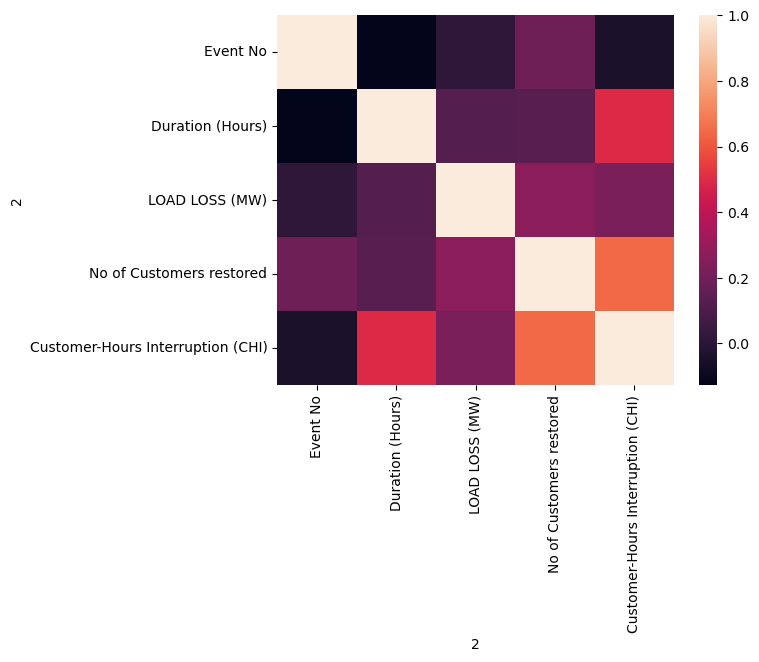

In [149]:
import seaborn as sns

sns.heatmap(correlation_matrix)

In [150]:
concatenated_df_filtered

2,Date,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Customer-Hours Interruption (CHI)
0,2021-01-01,INDUSTRIAL 33KV,1.0,EDC F/O,99,07:45:00,07:55:00,0.166667,2,25.0,4.166667
2,2021-01-01,EXPRESS 33KV,1.0,TCN L/S,1F,11:22:00,12:01:00,0.650000,10,1.0,0.650000
3,2021-01-01,INTERCHANGE 33KV,1.0,EDC F/O,99,14:49:00,15:16:00,0.450000,12,492.0,221.400000
4,2021-01-01,INDUSTRIAL 33KV,3.0,EDC F/O,99,16:52:00,17:41:00,0.816667,3,25.0,20.416667
5,2021-01-01,ROM 33KV,1.0,EDC F/O,99,14:49:00,15:23:00,0.566667,6,14.0,7.933333
...,...,...,...,...,...,...,...,...,...,...,...
7757,2021-12-29,T1 15MVA @ ELEYELE,1.0,EDC P/O,99,15:30:00,16:09:00,0.650000,5,4160.0,2704.000000
7758,2021-12-29,IYAGANKU 33KV,2.0,EDC F/O,99,16:14:00,17:41:00,1.450000,3,5.0,7.250000
7759,2021-12-29,APETE 33KV,2.0,EDC L/S,1F,17:05:00,23:59:00,0.000000,7,0.0,0.000000
7760,2021-12-29,IYAGANKU 33KV,3.0,EDC F/O,1F,21:11:00,22:53:00,1.700000,3,5.0,8.500000


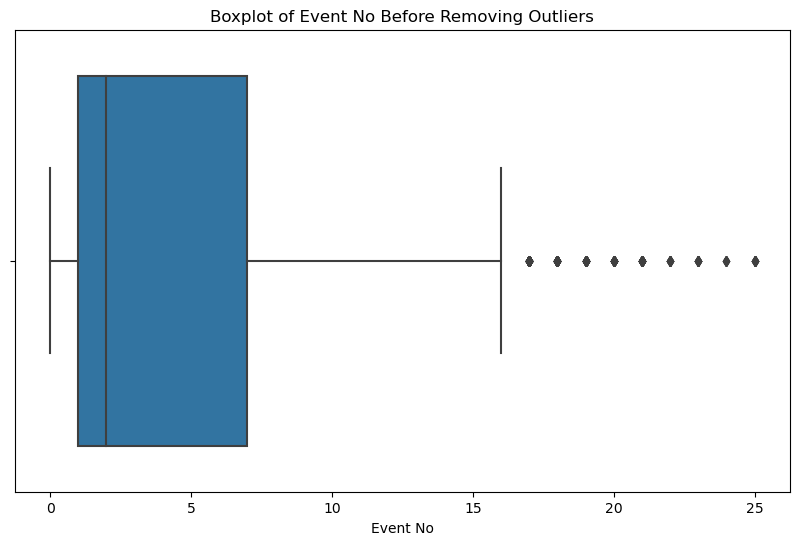

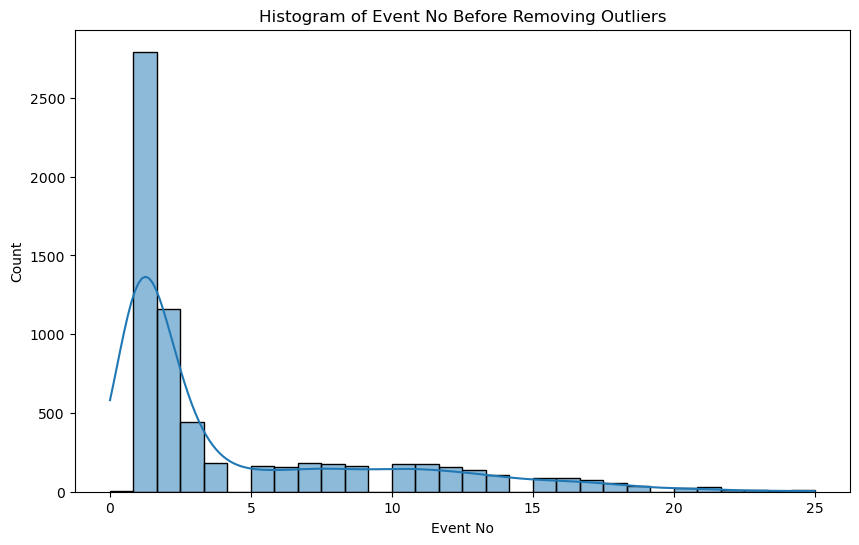

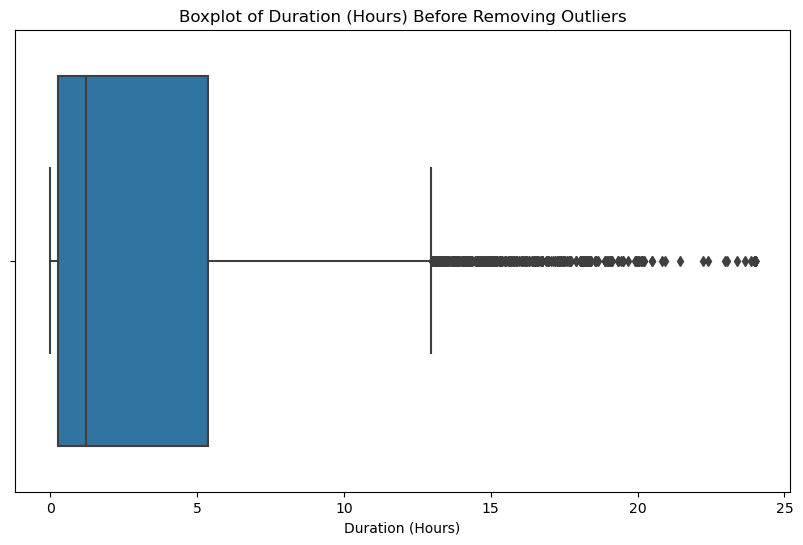

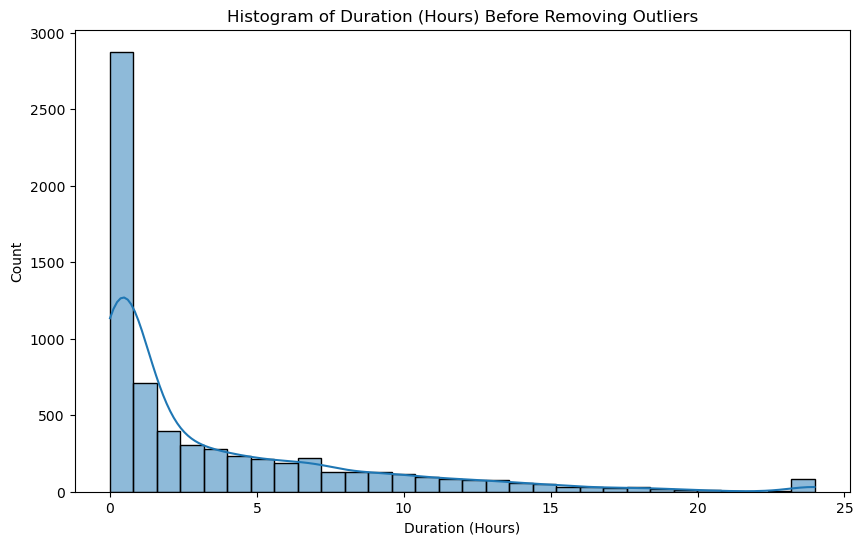

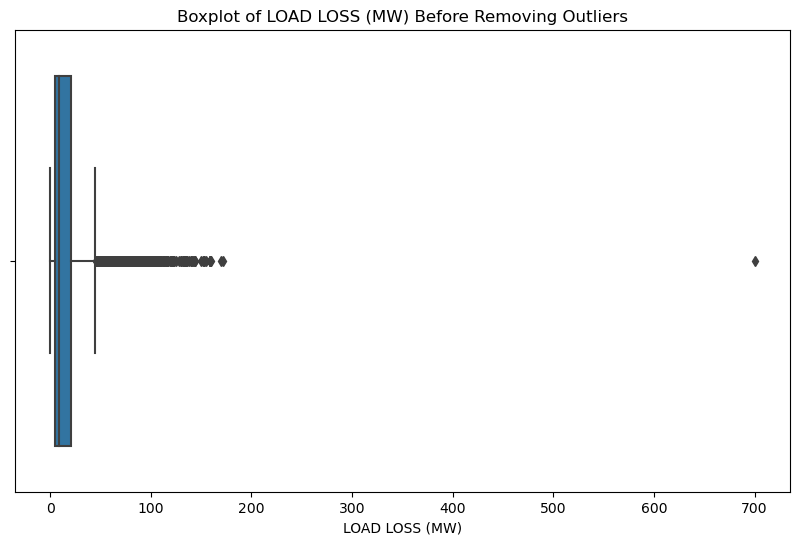

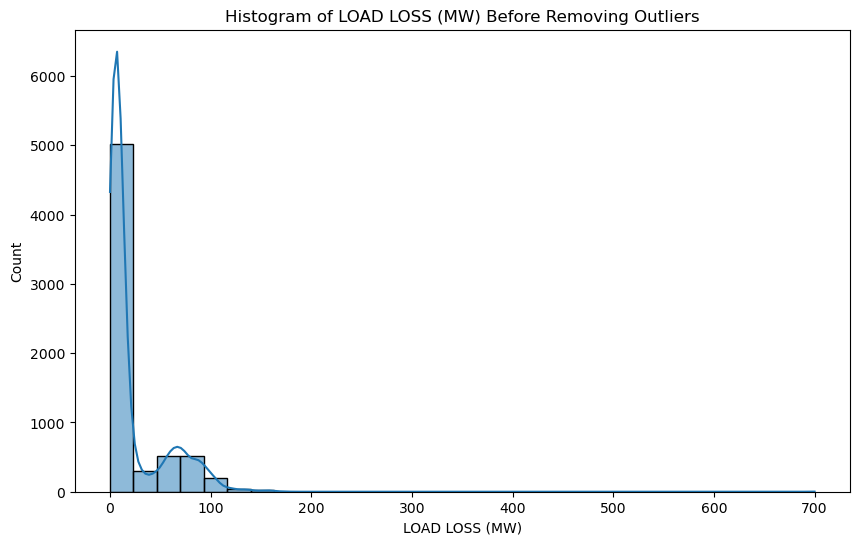

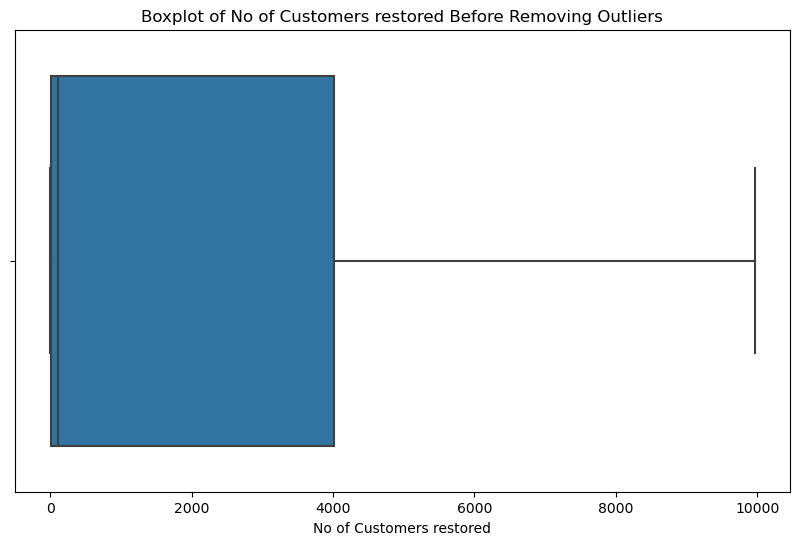

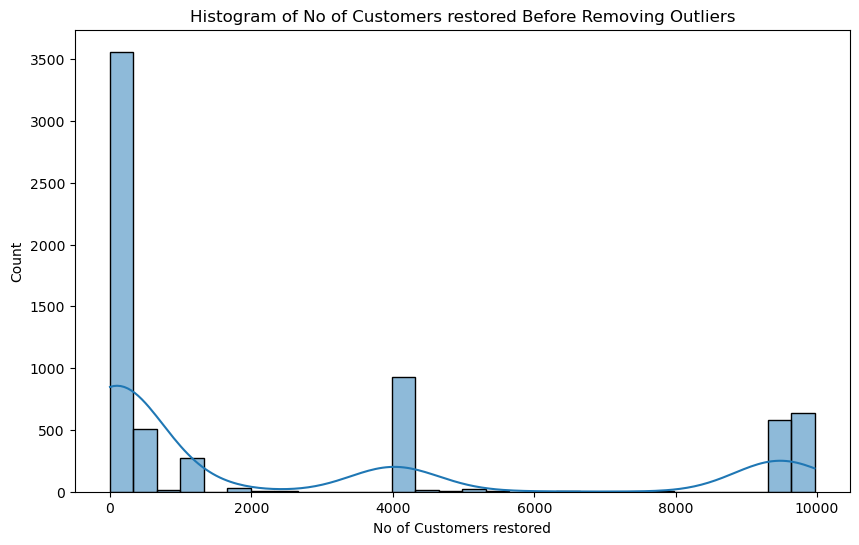

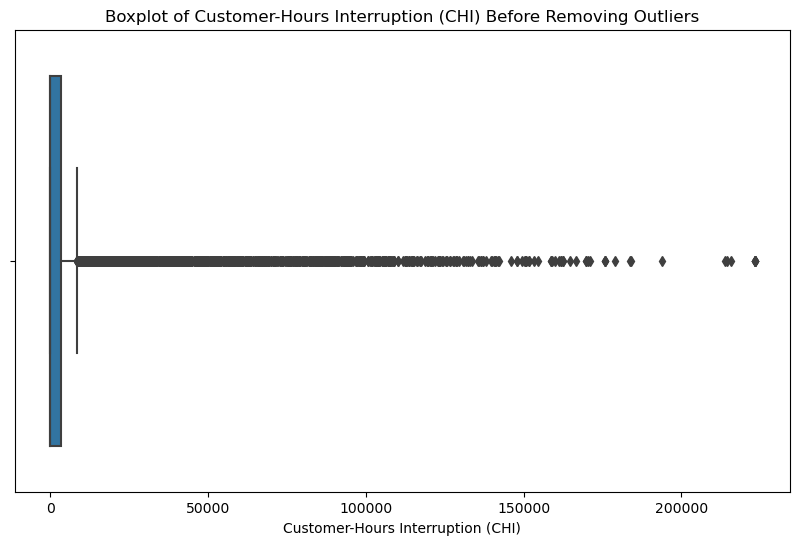

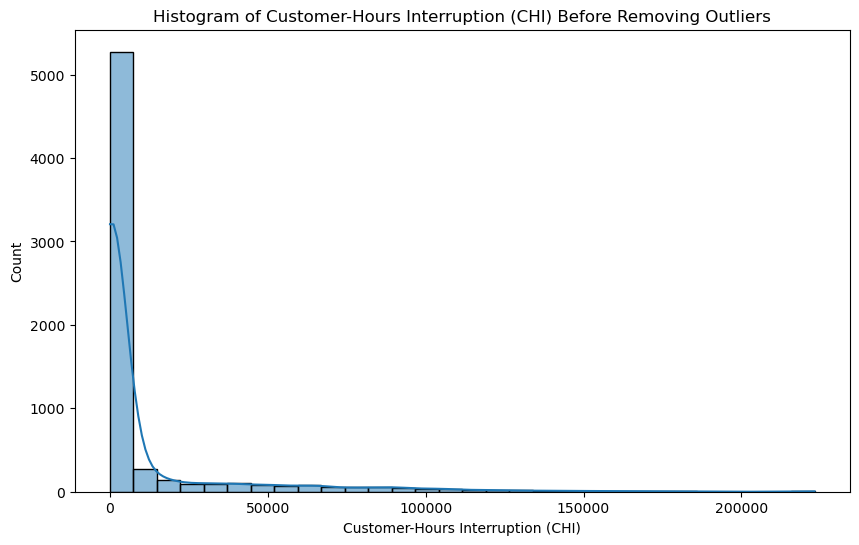

In [151]:
# Visualizing all numerical columns before dropping outliers
numerical_cols = concatenated_df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots and histograms for each numerical column
for col in numerical_cols:
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=concatenated_df_filtered, x=col)
    plt.title(f'Boxplot of {col} Before Removing Outliers')
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=concatenated_df_filtered, x=col, bins=30, kde=True)
    plt.title(f'Histogram of {col} Before Removing Outliers')
    plt.show()



In [152]:
# Outlier management for all numerical columns using z-score method

# Calculating the z-score for all numerical columns
z_scores = stats.zscore(concatenated_df_filtered[numerical_cols])

# Converting to a DataFrame for easier handling
z_scores_df = pd.DataFrame(z_scores, columns=numerical_cols)

# Defining a z-score threshold for outliers
zscore_threshold = 3

# Applying the threshold to filter out outliers
# Keeping only rows where all columns have a z-score within the threshold
concatenated_df_no = concatenated_df_filtered[(abs(z_scores_df) < zscore_threshold).all(axis=1)]

# Displaying the shape of the dataframes to compare
original_shape_all = concatenated_df_filtered.shape
no_outliers_shape_all = concatenated_df_no.shape

original_shape_all, no_outliers_shape_all


((6603, 11), (6148, 11))

In [153]:
concatenated_df_no

2,Date,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Customer-Hours Interruption (CHI)
0,2021-01-01,INDUSTRIAL 33KV,1.0,EDC F/O,99,07:45:00,07:55:00,0.166667,2,25.0,4.166667
2,2021-01-01,EXPRESS 33KV,1.0,TCN L/S,1F,11:22:00,12:01:00,0.650000,10,1.0,0.650000
3,2021-01-01,INTERCHANGE 33KV,1.0,EDC F/O,99,14:49:00,15:16:00,0.450000,12,492.0,221.400000
4,2021-01-01,INDUSTRIAL 33KV,3.0,EDC F/O,99,16:52:00,17:41:00,0.816667,3,25.0,20.416667
5,2021-01-01,ROM 33KV,1.0,EDC F/O,99,14:49:00,15:23:00,0.566667,6,14.0,7.933333
...,...,...,...,...,...,...,...,...,...,...,...
7757,2021-12-29,T1 15MVA @ ELEYELE,1.0,EDC P/O,99,15:30:00,16:09:00,0.650000,5,4160.0,2704.000000
7758,2021-12-29,IYAGANKU 33KV,2.0,EDC F/O,99,16:14:00,17:41:00,1.450000,3,5.0,7.250000
7759,2021-12-29,APETE 33KV,2.0,EDC L/S,1F,17:05:00,23:59:00,0.000000,7,0.0,0.000000
7760,2021-12-29,IYAGANKU 33KV,3.0,EDC F/O,1F,21:11:00,22:53:00,1.700000,3,5.0,8.500000


In [154]:
concatenated_df_no.isnull().sum()

2
Date                                 0
Name of Affected Feeder              0
Event No                             0
Type of Outage                       0
Nature/Cause of Outage               0
Start Time                           0
Time Restored                        0
Duration (Hours)                     0
LOAD LOSS (MW)                       0
No of Customers restored             0
Customer-Hours Interruption (CHI)    0
dtype: int64

In [155]:
concatenated_df_no['LOAD LOSS (MW)'].unique()

array([  2,  10,  12,   3,   6,   7,  11,   8, 110,   0,  80,  56,  17,
        18,  65,  76,  89,   9,  70, 105,  14,  16,  85,  55,  13,  48,
         4,  23,  84,   1,  60,  40,  19,   5,  72,  15,  24,  28,  78,
        64,  93,  69,  75,  35, 107,  58,  81,  21,  38,  82, 100,  96,
        68,  61,  98,  62,  20,  74,  91,  99,  51,  63,  53,  27,  95,
        73,  67,  50, 102,  71,  57, 103,  25,  31,  37,  42,  45,  32,
       101,  54,  90,  33,  34,  41,  88,  77,  52,  22,  86,  83,  97,
        36,  44,  46,  29,  49,  79,  66,  26, 115, 113, 114,  43,  39,
        94, 108, 112,  92,  30,  47,  59, 104,  87], dtype=int64)

### Feature Engineering

In [156]:
concatenated_df_no['Day of Week'] = concatenated_df_no['Date'].dt.day_name()
concatenated_df_no['Month'] = concatenated_df_no['Date'].dt.month
concatenated_df_no['Year'] = concatenated_df_no['Date'].dt.year


In [157]:
bins = [0, 1, 4, 24]  # defining bins as 0-1 hour, 1-4 hours, and 4-24 hours
labels = ['Short', 'Medium', 'Long']
concatenated_df_no['Duration Category'] = pd.cut(concatenated_df_no['Duration (Hours)'], bins=bins, labels=labels, include_lowest=True)


In [158]:
peak_hours = [(17, 21)]  # assuming peak hours are from 17:00 to 21:00
concatenated_df_no['Is Peak Hours'] = concatenated_df_no['Start Time'].apply(lambda x: any(start <= x.hour < end for start, end in peak_hours))


In [159]:
load_loss_bins = [0, 5, 15, 200]  # defining bins
load_loss_labels = ['Low', 'Medium', 'High']
concatenated_df_no['Load Loss Category'] = pd.cut(concatenated_df_no['LOAD LOSS (MW)'], bins=load_loss_bins, labels=load_loss_labels, include_lowest=True)


In [160]:
concatenated_df_no['Customer Impact Score'] = concatenated_df_no['No of Customers restored'] * concatenated_df_no['Duration (Hours)']


## Data Visualization of the Interruption data

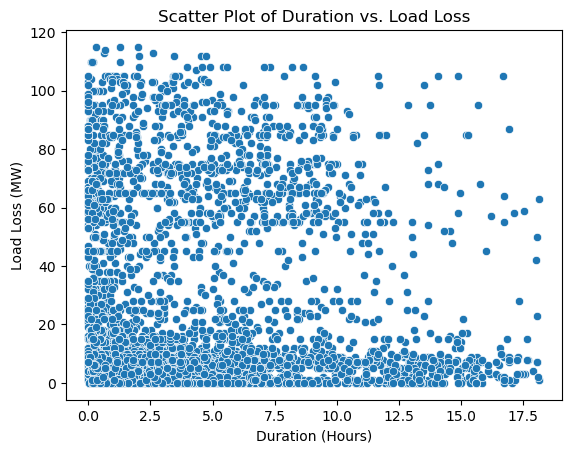

In [161]:
sns.scatterplot(data=concatenated_df_no, x='Duration (Hours)', y='LOAD LOSS (MW)')
plt.title('Scatter Plot of Duration vs. Load Loss')
plt.xlabel('Duration (Hours)')
plt.ylabel('Load Loss (MW)')
plt.show()


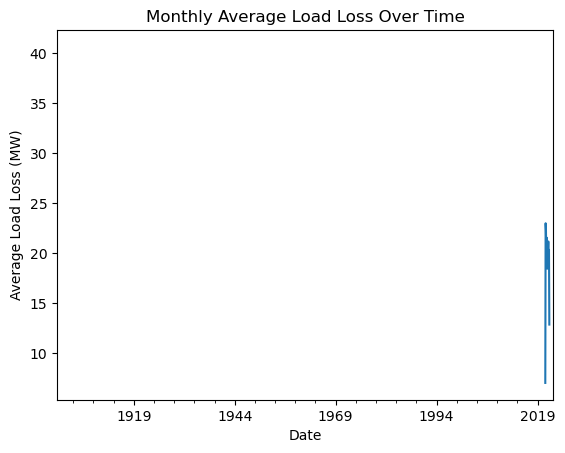

In [162]:
#concatenated_df_no['Date'] = pd.to_datetime(concatenated_df_no['Date'])
concatenated_df_no.set_index('Date', inplace=True)
concatenated_df_no['LOAD LOSS (MW)'].resample('M').mean().plot()
plt.title('Monthly Average Load Loss Over Time')
plt.xlabel('Date')
plt.ylabel('Average Load Loss (MW)')
plt.show()


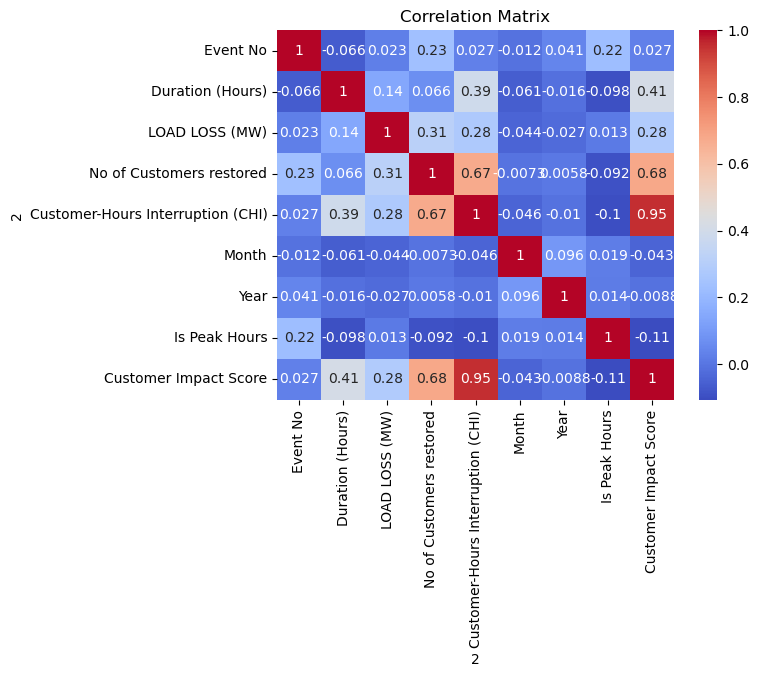

In [163]:
corr_matrix = concatenated_df_no.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


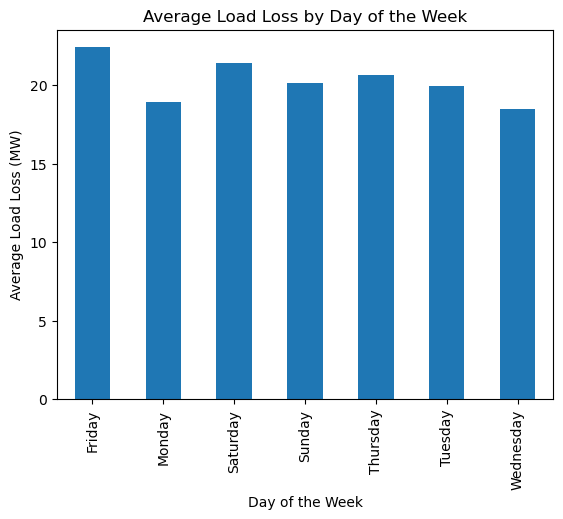

In [164]:
concatenated_df_no.groupby('Day of Week')['LOAD LOSS (MW)'].mean().plot(kind='bar')
plt.title('Average Load Loss by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Load Loss (MW)')
plt.show()


## Build the Machine Learning Models for Predicting the type of outages

In [165]:
concatenated_df_no

2,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Customer-Hours Interruption (CHI),Day of Week,Month,Year,Duration Category,Is Peak Hours,Load Loss Category,Customer Impact Score
Date,,,,,,,,,,,,,,,,,
2021-01-01,INDUSTRIAL 33KV,1.0,EDC F/O,99,07:45:00,07:55:00,0.166667,2,25.0,4.166667,Friday,1,2021,Short,False,Low,4.166667
2021-01-01,EXPRESS 33KV,1.0,TCN L/S,1F,11:22:00,12:01:00,0.650000,10,1.0,0.650000,Friday,1,2021,Short,False,Medium,0.650000
2021-01-01,INTERCHANGE 33KV,1.0,EDC F/O,99,14:49:00,15:16:00,0.450000,12,492.0,221.400000,Friday,1,2021,Short,False,Medium,221.400000
2021-01-01,INDUSTRIAL 33KV,3.0,EDC F/O,99,16:52:00,17:41:00,0.816667,3,25.0,20.416667,Friday,1,2021,Short,False,Low,20.416667
2021-01-01,ROM 33KV,1.0,EDC F/O,99,14:49:00,15:23:00,0.566667,6,14.0,7.933333,Friday,1,2021,Short,False,Medium,7.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-29,T1 15MVA @ ELEYELE,1.0,EDC P/O,99,15:30:00,16:09:00,0.650000,5,4160.0,2704.000000,Wednesday,12,2021,Short,False,Low,2704.000000
2021-12-29,IYAGANKU 33KV,2.0,EDC F/O,99,16:14:00,17:41:00,1.450000,3,5.0,7.250000,Wednesday,12,2021,Medium,False,Low,7.250000
2021-12-29,APETE 33KV,2.0,EDC L/S,1F,17:05:00,23:59:00,0.000000,7,0.0,0.000000,Wednesday,12,2021,Short,True,Medium,0.000000


In [169]:
concatenated_df_no.columns

Index(['Name of Affected Feeder', 'Event No', 'Type of Outage',
       'Nature/Cause of Outage', 'Start Time', 'Time Restored',
       'Duration (Hours)', 'LOAD LOSS (MW)', 'No of Customers restored',
       'Customer-Hours Interruption (CHI)', 'Day of Week', 'Month', 'Year',
       'Duration Category', 'Is Peak Hours', 'Load Loss Category',
       'Customer Impact Score'],
      dtype='object', name=2)

In [170]:
concatenated_df_no_new = concatenated_df_no.drop(['Start Time', 'Time Restored'], axis = 1)

In [171]:
concatenated_df_no_new

2,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Customer-Hours Interruption (CHI),Day of Week,Month,Year,Duration Category,Is Peak Hours,Load Loss Category,Customer Impact Score
Date,,,,,,,,,,,,,,,
2021-01-01,INDUSTRIAL 33KV,1.0,1,99,0.166667,2,25.0,4.166667,Friday,1,2021,Short,False,Low,4.166667
2021-01-01,EXPRESS 33KV,1.0,2,1F,0.650000,10,1.0,0.650000,Friday,1,2021,Short,False,Medium,0.650000
2021-01-01,INTERCHANGE 33KV,1.0,1,99,0.450000,12,492.0,221.400000,Friday,1,2021,Short,False,Medium,221.400000
2021-01-01,INDUSTRIAL 33KV,3.0,1,99,0.816667,3,25.0,20.416667,Friday,1,2021,Short,False,Low,20.416667
2021-01-01,ROM 33KV,1.0,1,99,0.566667,6,14.0,7.933333,Friday,1,2021,Short,False,Medium,7.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-29,T1 15MVA @ ELEYELE,1.0,7,99,0.650000,5,4160.0,2704.000000,Wednesday,12,2021,Short,False,Low,2704.000000
2021-12-29,IYAGANKU 33KV,2.0,1,99,1.450000,3,5.0,7.250000,Wednesday,12,2021,Medium,False,Low,7.250000
2021-12-29,APETE 33KV,2.0,3,1F,0.000000,7,0.0,0.000000,Wednesday,12,2021,Short,True,Medium,0.000000


In [172]:
def unique(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            distinct_types = df[i].unique()

            print(f'The unique values in {i} is {distinct_types}')

In [173]:
unique(concatenated_df_no_new)

The unique values in Name of Affected Feeder is ['INDUSTRIAL 33KV' 'EXPRESS 33KV' 'INTERCHANGE 33KV' 'ROM 33KV'
 'APETE 33KV' 'MINISTER 33KV' 'ELEYELE 33KV' 'APATA 33KV'
 'OMI ADIO 33KV FDR' 'ERUWA TOWN  33KV FDR' 'OLUYOLE 33KV'
 '40MVA @ JERICHO' 'AGODI 1 33KV' 'T 2B' 'T 2A' 'AGODI 2 33KV'
 'FAN MILK 33KV' 'OMI-ADIO 33KV FDR' 'ERUWA LANLATE 33KV' 'MINISTER 33'
 'ERUWA TOWN 33KV FDR' 'ERUWA LANLATE 33KV FDR' 'LIBERTY 33KV'
 'SAMONDA 33KV' 'IYAGANKU 33KV' 'SAMANDA 33KV' 'ERUWA-TOWN 33KV FDR'
 'INTERCHNAGE 33KV' 'T2 40MVA @ AGODI 2' 'FANMILK 33KV' '15MVA @ SAMONDA'
 'SAMONDA 33KV ' 'ERUWA/LANLATE 33KV FDR' 'APATA 33KV FDR' 'T2A @ JERICHO'
 'T-2B 15MVA @ JERICHO' 'EXPRESS 33KV ' 'T-2A 15mva @ JERICHO'
 'OLUYOLE  33KV' 'ERUWA/LANLATE 11KV FDR' 'ERUWA/LANLATE 33IV FDR'
 'LIBERTY 33KV ' 'IYAGANKU 33KV ' 'INTERCHANGE 33KV '
 'T-2A 15MVA @ JERICHO' 'SAMONDA  33KV' 'T2 @ JERICHO' 'T1 @ ELEYELE'
 'INDUSTRIAL 33KV ' 'AGODI 1  33KV' 'AGODI 2  33KV'
 'T-2 15MVA @ AGODI ISS' 'APATA 33KV FEEDER' 'IND

In [174]:
concatenated_df_no_new['Type of Outage'] = concatenated_df_no_new['Type of Outage'].replace({'EDC F/O': 1, 'TCN L/S': 2, 'EDC L/S': 3, 'TCN F/O': 4,
                                                                                 'EDC E/F': 5, 'TCN P/O': 6, 'EDC P/O': 7, 'EDC O/C': 8, 'GEN S/C': 9})


In [175]:
concatenated_df_no_new.dtypes

2
Name of Affected Feeder                object
Event No                              float64
Type of Outage                          int64
Nature/Cause of Outage                 object
Duration (Hours)                      float64
LOAD LOSS (MW)                          int64
No of Customers restored              float64
Customer-Hours Interruption (CHI)     float64
Day of Week                            object
Month                                   int64
Year                                    int64
Duration Category                    category
Is Peak Hours                            bool
Load Loss Category                   category
Customer Impact Score                 float64
dtype: object

In [176]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()


def encoder(df):
    encoders = {}  # To store label encoders
    for i in df.columns:
        if df[i].dtype == 'O':
            lb = LabelEncoder()
            df[i] = lb.fit_transform(df[i])
            encoders[i] = lb  # Store the encoder
    return df, encoders

In [177]:
concatenated_df_no_new, encoders = encoder(concatenated_df_no_new)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [ ]:
interruption_df

2,Date,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Start Time,Time Restored,Duration (Hours),LOAD LOSS (MW),No of Customers restored,Customer-Hours Interruption (CHI),Relay Target
0,2021-01-01,INDUSTRIAL 33KV,1.0,1,99,07:45:00,07:55:00,0.166667,2.0,25.0,4.166667,6.0
2,2021-01-01,EXPRESS 33KV,1.0,2,1F,11:22:00,12:01:00,0.650000,10.0,1.0,0.650000,7.0
3,2021-01-01,INTERCHANGE 33KV,1.0,1,99,14:49:00,15:16:00,0.450000,12.0,492.0,221.400000,6.0
4,2021-01-01,INDUSTRIAL 33KV,3.0,1,99,16:52:00,17:41:00,0.816667,3.0,25.0,20.416667,1.0
5,2021-01-01,ROM 33KV,1.0,1,99,14:49:00,15:23:00,0.566667,6.0,14.0,7.933333,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6696,2021-12-29,T1 15MVA @ ELEYELE,1.0,7,99,15:30:00,16:09:00,0.650000,5.0,4160.0,2704.000000,1.0
6697,2021-12-29,IYAGANKU 33KV,2.0,1,99,16:14:00,17:41:00,1.450000,3.0,5.0,7.250000,6.0
6698,2021-12-29,APETE 33KV,2.0,3,1F,17:05:00,23:59:00,0.000000,7.0,0.0,0.000000,7.0
6699,2021-12-29,IYAGANKU 33KV,3.0,1,1F,21:11:00,22:53:00,1.700000,3.0,5.0,8.500000,7.0


In [ ]:
distinct_types = interruption_df['Nature/Cause of Outage'].unique()
print(distinct_types)

[99 '1F' '2A' '2B' '1D' '1I' '1B' '5A' 9 66 3 0 '3B' '4A' 6 '1E' '1G' '1A'
 '7B']


In [ ]:
interruption_df['Nature/Cause of Outage'] = interruption_df['Nature/Cause of Outage'].replace({99: 1, '1F': 2, '4A': 3, '2A': 4,
                                                                                 '2B': 5, '1D': 6, '3B': 7, '1I': 8, '1E': 9, '1B': 10, '5A': 11,
                                                                                                 9: 12, 66: 13, 3: 14, 0: 15, 6: 16, '1G': 17, '1A': 18,
                                                                                                 '7B': 19})

In [ ]:
interruption_df.isnull().sum()

2
Date                                 0
Name of Affected Feeder              0
Event No                             0
Type of Outage                       0
Nature/Cause of Outage               0
Start Time                           0
Time Restored                        0
Duration (Hours)                     0
LOAD LOSS (MW)                       0
No of Customers restored             0
Customer-Hours Interruption (CHI)    0
Relay Target                         0
dtype: int64

In [ ]:
distinct_types = interruption_df['Customer-Hours Interruption (CHI)'].unique()
print(distinct_types)

[4.16666667e+00 6.50000000e-01 2.21400000e+02 ... 2.70400000e+03
 7.25000000e+00 8.50000000e+00]


In [ ]:
interruption_df.dtypes

2
Date                                 datetime64[ns]
Name of Affected Feeder                      object
Event No                                    float64
Type of Outage                                int64
Nature/Cause of Outage                        int64
Start Time                                   object
Time Restored                                object
Duration (Hours)                            float64
LOAD LOSS (MW)                              float64
No of Customers restored                    float64
Customer-Hours Interruption (CHI)           float64
Relay Target                                float64
dtype: object

In [ ]:

interruption_df['Type of Outage'] = interruption_df['Type of Outage'].astype('category')


In [ ]:
# Define the independent variables (features) and the dependent variable (target)
X = interruption_df.iloc[:, [2, 4, 7, 8, 9, 10, 11]].values
y = interruption_df.iloc[:, 3].values



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression Model

In [ ]:
# Create a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR_model = LogisticRegression(random_state = 0)

In [ ]:
# Train the model using the training data
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Make predictions on the testing data
y_pred = LR_model.predict(X_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.93      0.76       577
           2       0.70      0.56      0.62       215
           3       0.54      0.36      0.43       107
           4       0.00      0.00      0.00        27
           5       0.69      0.67      0.68       196
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         3

    accuracy                           0.65      1257
   macro avg       0.29      0.28      0.28      1257
weighted avg       0.57      0.65      0.60      1257



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[534,  12,  13,   0,  18,   0,   0,   0,   0],
       [ 78, 120,  14,   0,   3,   0,   0,   0,   0],
       [ 48,  20,  38,   0,   1,   0,   0,   0,   0],
       [ 25,   0,   0,   0,   2,   0,   0,   0,   0],
       [ 52,   9,   4,   0, 131,   0,   0,   0,   0],
       [ 23,   1,   0,   0,   0,   0,   0,   0,   0],
       [ 56,   4,   0,   0,  10,   0,   0,   0,   0],
       [  7,   5,   0,   0,  26,   0,   0,   0,   0],
       [  1,   1,   1,   0,   0,   0,   0,   0,   0]])

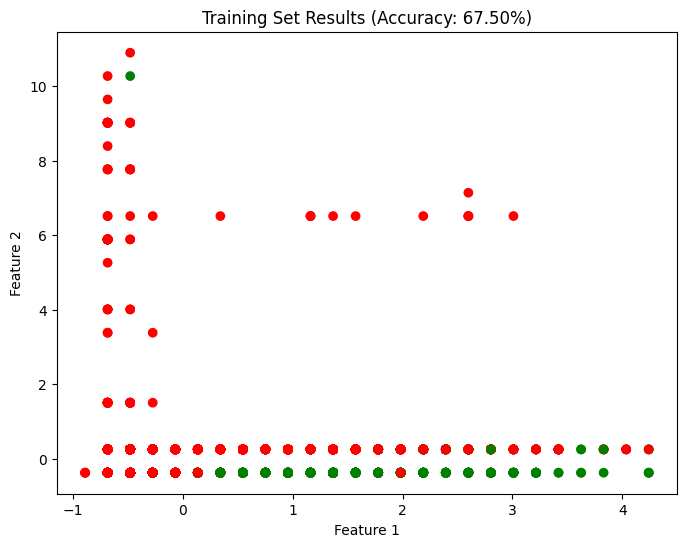

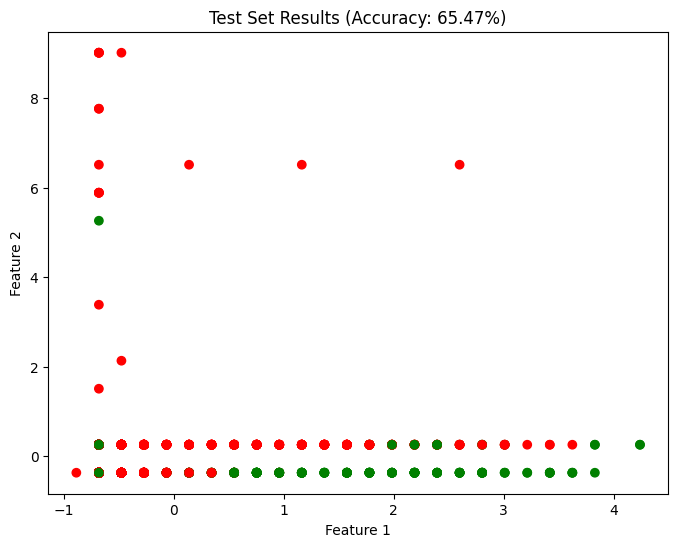

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

# Assuming you have trained the logistic regression model and obtained the predicted classes

# Plotting training set results
train_pred = LR_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_cm = confusion_matrix(y_train, train_pred)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_pred, cmap=ListedColormap(('red', 'green')))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Set Results (Accuracy: {:.2f}%)'.format(train_accuracy * 100))
plt.show()

# Plotting test set results
test_pred = LR_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
test_cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_pred, cmap=ListedColormap(('red', 'green')))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Set Results (Accuracy: {:.2f}%)'.format(test_accuracy * 100))
plt.show()


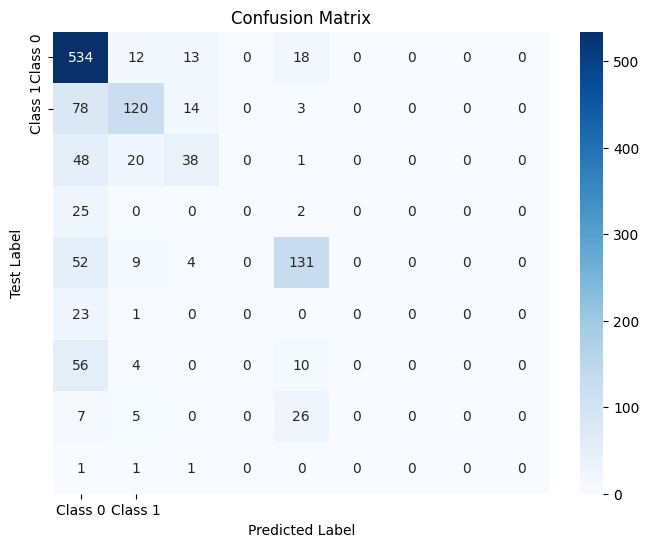

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a list of class labels (assuming binary classification)
class_labels = ['Class 0', 'Class 1']

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Test Label')
plt.show()

In [ ]:
# Print the predicted values
print(y_pred)

[1 2 2 ... 1 3 5]


In [ ]:
# Define a dictionary to map the original values to the desired strings
value_map = {1: "EDC F/O", 2: "TCN L/S", 3: "EDC L/S", 4: "TCN F/O", 5: "EDC E/F", 6: "TCN P/O", 7: "EDC P/O", 8: "EDC O/C", 9: 'GEN S/C'}

In [ ]:
# Replace the values in 'y_pred' with the desired strings
y_pred_mapped = [value_map[value] for value in y_pred]

In [ ]:
# Print the updated predicted values
print(y_pred_mapped)

['EDC F/O', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC E/F', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC E/F', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC L/S', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC L/S', 'EDC F/O', 'EDC F/O'

### Decision Tree Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the independent variables (features) and the dependent variable (target)
X = interruption_df.iloc[:, [2, 4, 7, 8, 9, 10, 11]].values
y = interruption_df.iloc[:, 3].values

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.7637231503579952
Confusion Matrix:
[[499  21   7  17   8   8  16   1   0]
 [ 21 174   8   1   2   3   6   0   0]
 [ 10  10  86   0   0   0   0   1   0]
 [ 13   1   0   6   1   3   3   0   0]
 [  9   5   0   2 150   0   0  30   0]
 [  9   3   0   1   0   8   3   0   0]
 [ 26   6   1   1   3  10  23   0   0]
 [  1   1   0   0  23   0   0  13   0]
 [  1   0   0   0   0   0   1   0   1]]


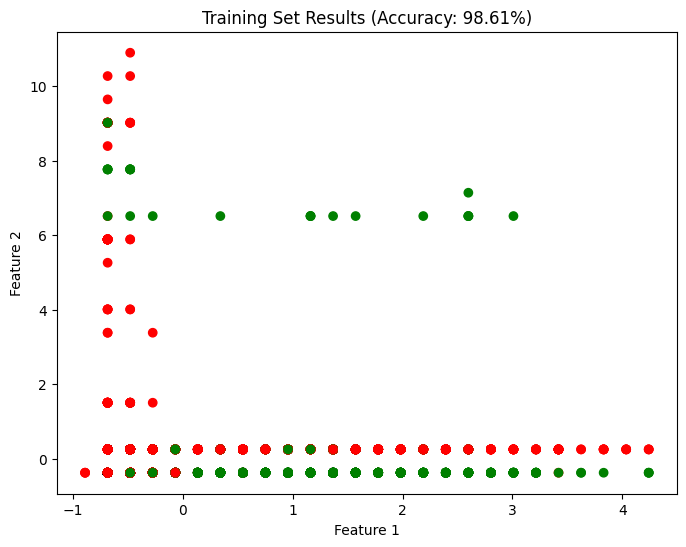

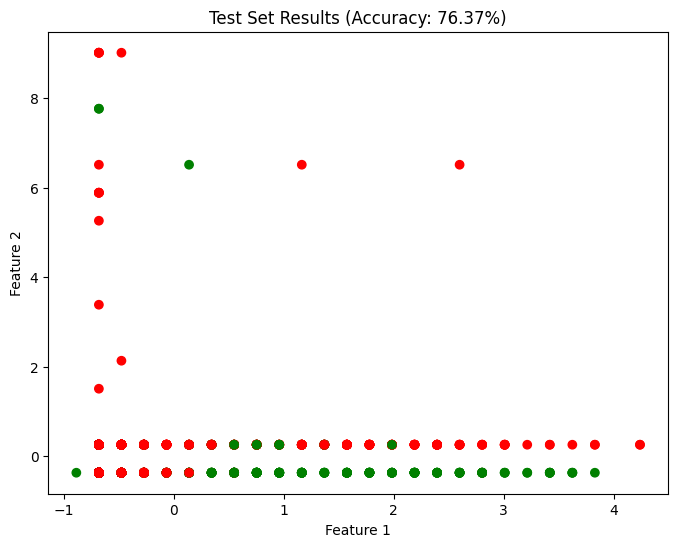

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap


# Plotting training set results
train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_cm = confusion_matrix(y_train, train_pred)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_pred, cmap=ListedColormap(('red', 'green')))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Set Results (Accuracy: {:.2f}%)'.format(train_accuracy * 100))
plt.show()

# Plotting test set results
test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
test_cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_pred, cmap=ListedColormap(('red', 'green')))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Set Results (Accuracy: {:.2f}%)'.format(test_accuracy * 100))
plt.show()


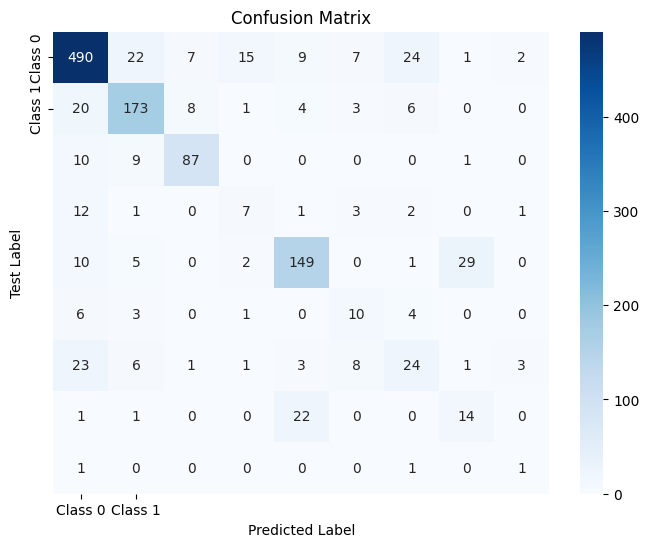

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a list of class labels (assuming binary classification)
class_labels = ['Class 0', 'Class 1']

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Test Label')
plt.show()

In [ ]:
# Print the predicted values
print(y_pred)

[1 1 1 ... 0 2 0]


In [ ]:
# Define a dictionary to map the original values to the desired strings
value_map = {1: "EDC F/O", 2: "TCN L/S", 3: "EDC L/S", 4: "TCN F/O", 5: "EDC E/F", 6: "TCN P/O", 7: "EDC P/O", 8: "EDC O/C", 9: 'GEN S/C'}

In [ ]:
# Replace the values in 'y_pred' with the desired strings
y_pred_mapped = [value_map[value] for value in y_pred]

KeyError: ignored

In [ ]:
# Print the updated predicted values
print(y_pred_mapped)

['TCN L/S', 'TCN L/S', 'TCN L/S', 'EDC E/F', 'EDC F/O', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'TCN F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC O/C', 'EDC O/C', 'TCN F/O', 'EDC F/O', 'EDC O/C', 'TCN L/S', 'EDC P/O', 'EDC F/O', 'EDC F/O', 'EDC P/O', 'EDC P/O', 'EDC O/C', 'EDC F/O', 'EDC F/O', 'EDC O/C', 'EDC E/F', 'EDC F/O', 'EDC L/S', 'EDC F/O', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'TCN P/O', 'EDC O/C', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC P/O', 'EDC F/O', 'TCN F/O', 'EDC O/C', 'EDC F/O', 'EDC E/F', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC P/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'TCN F/O', 'EDC E/F', 'TCN L/S', 'TCN L/S', 'TCN P/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC L/S', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC L/S', 'TCN L/S', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC F/O'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the independent variables (features) and the dependent variable (target)
X = interruption_df.iloc[:, [2, 4, 7, 8, 9, 10, 11]].values
y = interruption_df.iloc[:, 3].values

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the XGBoost model
num_classes = len(label_encoder.classes_)
XG_model = XGBClassifier(objective='multi:softmax', num_class=num_classes)
XG_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = XG_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8076311605723371
Confusion Matrix:
[[527  14   5  15   5   3  19   0   1]
 [  5 193   8   0   0   0   1   0   0]
 [  5   6  88   0   0   0   0   0   0]
 [ 24   1   0   3   0   2   4   0   0]
 [  6   2   0   1 165   0   1  11   0]
 [  4   7   0   0   0   7   7   0   0]
 [ 31   7   1   1   1   3  20   1   0]
 [  2   0   0   0  34   0   1  11   0]
 [  2   0   0   0   0   0   1   0   2]]


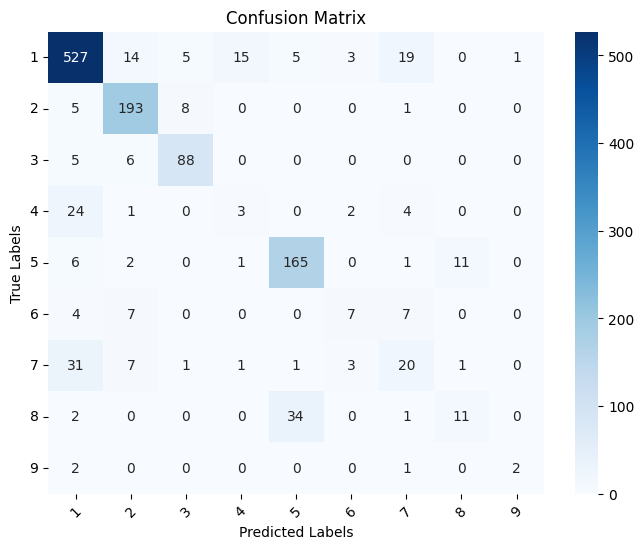

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(label_encoder.classes_, rotation=45)
ax.yaxis.set_ticklabels(label_encoder.classes_, rotation=0)

# Show the plot
plt.show()


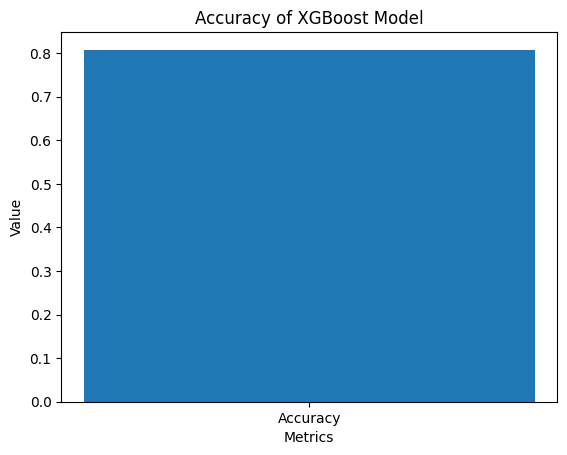

In [ ]:
import matplotlib.pyplot as plt

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)

# Create a bar plot
plt.bar(['Accuracy'], [accuracy])

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Accuracy of XGBoost Model')

# Display the plot
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Create the XGBoost model
XG_model = XGBClassifier(objective='multi:softmax', num_class=num_classes)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=XG_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
predictions = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8241845664280032
Confusion Matrix:
[[540  15   4   1   6   1  10   0   0]
 [ 13 188   8   2   1   0   3   0   0]
 [ 12   4  91   0   0   0   0   0   0]
 [ 24   1   0   1   1   0   0   0   0]
 [  7   6   0   0 178   0   1   4   0]
 [ 12   5   0   0   0   6   1   0   0]
 [ 31   6   0   0   4   3  26   0   0]
 [  1   0   0   0  32   0   0   5   0]
 [  2   0   0   0   0   0   0   0   1]]


In [ ]:
# Print the predicted values
print(predictions)

[0 1 1 ... 0 2 0]


In [ ]:
# Reverse the encoding of predictions
predictions_decoded = label_encoder.inverse_transform(predictions)

# Reverse the encoding of y_test
y_test_decoded = label_encoder.inverse_transform(y_test)

# Print the decoded predictions and y_test
print("Decoded Predictions:", predictions_decoded)
print("Decoded y_test:", y_test_decoded)

Decoded Predictions: [1 2 2 ... 1 3 1]
Decoded y_test: [1 2 2 ... 1 3 1]


In [ ]:
# Define a dictionary to map the original values to the desired strings
value_map = {1: "EDC F/O", 2: "TCN L/S", 3: "EDC L/S", 4: "TCN F/O", 5: "EDC E/F", 6: "TCN P/O", 7: "EDC P/O", 8: "EDC O/C", 9: 'GEN S/C'}

In [ ]:
# Replace the values in 'y_pred' with the desired strings
predictions_mapped = [value_map[value] for value in predictions_decoded]
y_test_mapped = [value_map[value] for value in y_test_decoded]

In [ ]:
print("Predictions:", predictions_mapped)
print("True Values:", y_test_mapped)

Predictions: ['EDC F/O', 'TCN L/S', 'TCN L/S', 'EDC E/F', 'EDC F/O', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC P/O', 'EDC O/C', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC O/C', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC E/F', 'EDC F/O', 'EDC L/S', 'EDC P/O', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC P/O', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'TCN L/S', 'EDC P/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC E/F', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'TCN L/S', 'EDC F/O', 'EDC E/F', 'TCN L/S', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'TCN L/S', 'EDC F/O', 'EDC F/O', 'EDC L/S', 'EDC F/O', 'EDC F/O', 'EDC E/F', 'EDC F/O', 'EDC F/O', 'EDC F/O', 'EDC L/S', 'TCN L/S', 'EDC F/O', 'EDC E/F', 'EDC E/F', 'EDC F/

In [ ]:
import pandas as pd

# Convert start time and restore time columns to datetime format
interruption_df['Start Time'] = pd.to_datetime(interruption_df['Start Time'])
interruption_df['Time Restored'] = pd.to_datetime(interruption_df['Time Restored'])

# Convert both columns to a different timezone
common_timezone = 'UTC'  # Choose the desired timezone
interruption_df['Start Time'] = interruption_df['Start Time'].dt.tz_convert(common_timezone)
interruption_df['Time Restored'] = interruption_df['Time Restored'].dt.tz_convert(common_timezone)

# Calculate the duration of each event
interruption_df['Duration'] = interruption_df['Time Restored'] - interruption_df['Start Time']


In [ ]:
# Calculate MTTR
mttr = interruption_df['Duration'].mean()

# Calculate MTBF
mtbf = (interruption_df['Start Time'].diff() - interruption_df['Duration']).mean()

print("MTTR:", mttr)
print("MTBF:", mtbf)


MTTR: 0 days 04:23:36.301718650
MTBF: -1 days +20:59:26.977558492


Artificial Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the independent variables (features) and the dependent variable (target)
X = interruption_df.iloc[:, [2, 4, 7, 8, 9, 10, 11]].values
y = interruption_df.iloc[:, 3].values

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create the ANN model
model = keras.Sequential([
    keras.layers.Dense(units=128, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=9, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=-1))

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)


Epoch 1/100
158/158 [==============================] - 2s 2ms/step - loss: 1.1195 - accuracy: 0.6819
Epoch 2/100
158/158 [==============================] - 0s 2ms/step - loss: 0.7759 - accuracy: 0.7559
Epoch 3/100
158/158 [==============================] - 0s 2ms/step - loss: 0.7234 - accuracy: 0.7694
Epoch 4/100
158/158 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.7775
Epoch 5/100
158/158 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.7863
Epoch 6/100
158/158 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.7871
Epoch 7/100
158/158 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7869
Epoch 8/100
158/158 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.7913
Epoch 9/100
158/158 [==============================] - 1s 3ms/step - loss: 0.6348 - accuracy: 0.7897
Epoch 10/100
158/158 [==============================] - 1s 3ms/step - loss: 0.6326 - accura

40/40 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.7711
Test Loss: 0.6664977073669434
Test Accuracy: 0.7710651755332947
40/40 [==============================] - 0s 2ms/step


ValueError: ignored

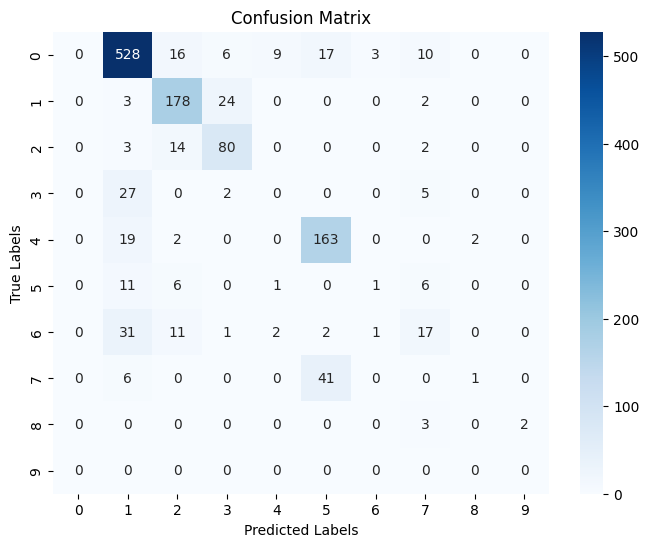

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=-1))

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(label_encoder.classes_, rotation=45)
ax.yaxis.set_ticklabels(label_encoder.classes_, rotation=0)

# Display the plot
plt.show()

# Create a bar plot for accuracy
plt.bar(['Accuracy'], [accuracy])

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Accuracy of ANN Model')

# Display the plot
plt.show()


40/40 [==============================] - 1s 16ms/step - loss: 0.6665 - accuracy: 0.7711
Test Loss: 0.6664977073669434
Test Accuracy: 0.7710651755332947
40/40 [==============================] - 0s 6ms/step


ValueError: ignored

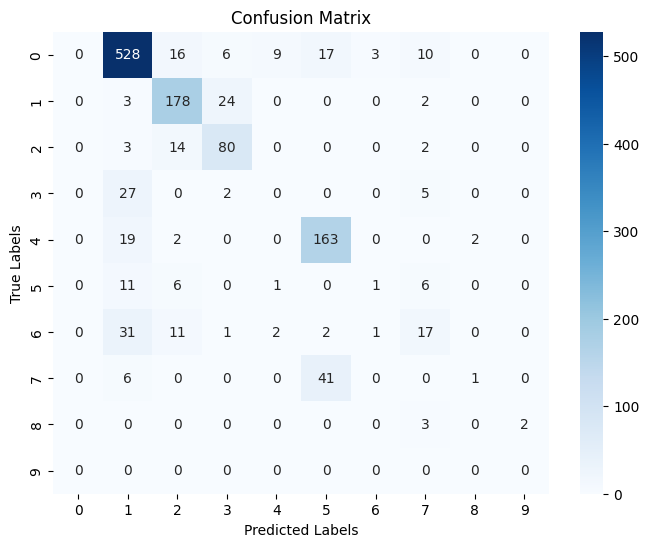

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=-1))

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
class_labels = sorted(label_encoder.classes_)  # Sort class labels alphabetically
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(class_labels, rotation=45)
ax.yaxis.set_ticklabels(class_labels, rotation=0)

# Display the plot
plt.show()

# Create a bar plot for accuracy
plt.bar(['Accuracy'], [accuracy])

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Accuracy of ANN Model')

# Display the plot
plt.show()


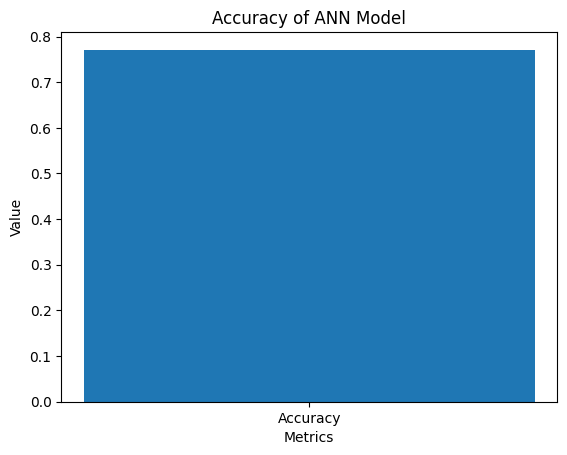

In [ ]:
# Create a bar plot for accuracy
plt.bar(['Accuracy'], [accuracy])

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Accuracy of ANN Model')

# Display the plot
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the independent variables (features) and the dependent variable (target)
X = interruption_df.iloc[:, [2, 4, 7, 8, 9, 10, 11]].values
y = interruption_df.iloc[:, 3].values

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=-1))

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)


Epoch 1/100
158/158 [==============================] - 3s 7ms/step - loss: 1.3564 - accuracy: 0.6175
Epoch 2/100
158/158 [==============================] - 1s 7ms/step - loss: 0.8391 - accuracy: 0.7461
Epoch 3/100
158/158 [==============================] - 1s 7ms/step - loss: 0.7537 - accuracy: 0.7642
Epoch 4/100
158/158 [==============================] - 1s 7ms/step - loss: 0.7113 - accuracy: 0.7706
Epoch 5/100
158/158 [==============================] - 1s 5ms/step - loss: 0.6864 - accuracy: 0.7811
Epoch 6/100
158/158 [==============================] - 1s 5ms/step - loss: 0.6708 - accuracy: 0.7795
Epoch 7/100
158/158 [==============================] - 1s 5ms/step - loss: 0.6539 - accuracy: 0.7871
Epoch 8/100
158/158 [==============================] - 1s 5ms/step - loss: 0.6462 - accuracy: 0.7915
Epoch 9/100
158/158 [==============================] - 1s 5ms/step - loss: 0.6406 - accuracy: 0.7881
Epoch 10/100
158/158 [==============================] - 1s 5ms/step - loss: 0.6312 - accura

40/40 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.7846
Test Loss: 0.6403834223747253
Test Accuracy: 0.7845786809921265
40/40 [==============================] - 0s 5ms/step


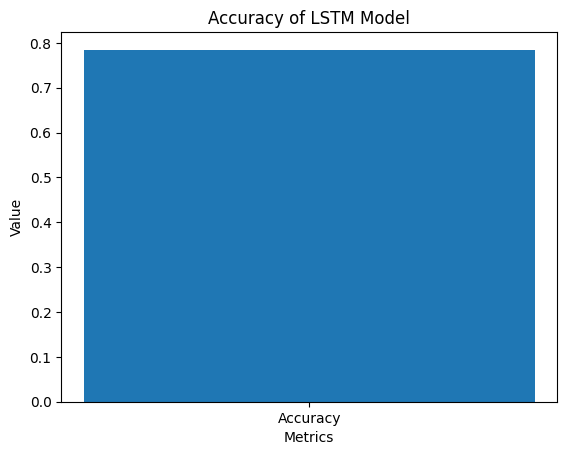

ValueError: ignored

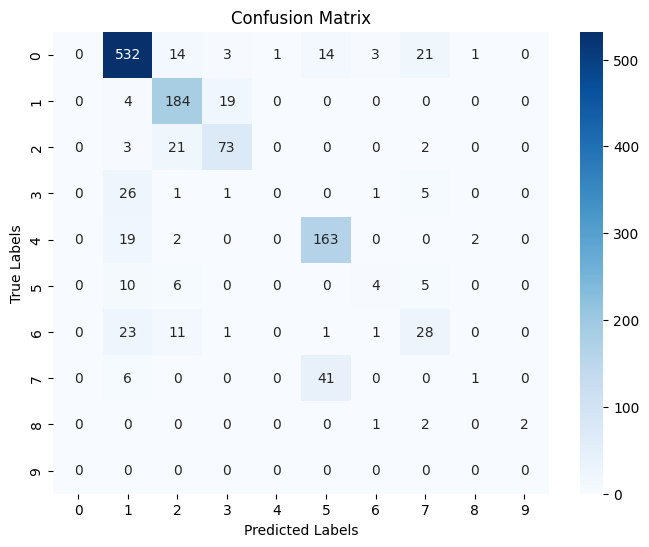

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=-1))

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Create a bar plot for accuracy
plt.bar(['Accuracy'], [accuracy])

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Accuracy of LSTM Model')

# Display the plot
plt.show()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
class_labels = sorted(label_encoder.classes_)  # Sort class labels alphabetically
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(class_labels, rotation=45)
ax.yaxis.set_ticklabels(class_labels, rotation=0)

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
ann_accuracy = 0.7710651755332947
xgb_accuracy = 0.8095238095238095
lstm_accuracy = 0.7845786809921265

# Create a bar plot
models = ['ANN', 'XGBoost', 'RNN-LSTM']
accuracies = [ann_accuracy, xgb_accuracy, lstm_accuracy]

plt.bar(models, accuracies)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Add labels to the bars
for i, v in enumerate(accuracies):
    plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')

# Display the plot
plt.show()


In [ ]:
df1

,Date,NAME OF TCN,33kV FEEDERS,S/N,11kV FEEDERS,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,...,22:00:00,23:00:00,PEAK LOAD,TIME,DAY PEAK,TIME ATTAINED,NIGHT PEAK,TIME ATTAINED.1,AVERAGE,HOS
0,2019-04-01,AYEDE,Oluyole 33kV,OLUYOLE 15MVA T1,NaN,353,337,324,315,343,...,213,191,8.000000,16:00:00,8.000000,16:00:00,7.883333,20:00:00,6.359259,18
1,2019-04-01,NaN,NaN,1,AJINDE 11kV,216,201,188,177,179,...,L/S,L/S,4.466667,19:00:00,3.616667,06:00:00,4.466667,19:00:00,3.415625,16
2,2019-04-01,NaN,NaN,2,YALE 11kV,2,5,4,6,21,...,32,27,1.200000,16:00:00,1.200000,16:00:00,0.533333,22:00:00,0.567593,18
3,2019-04-01,NaN,NaN,3,OLUSANYA 11kV,84,80,76,75,75,...,104,96,2.300000,15:00:00,2.300000,15:00:00,1.900000,19:00:00,1.657407,18
4,2019-04-01,NaN,NaN,4,7UP 11kV,54,56,58,60,60,...,77,68,1.550000,14:00:00,1.550000,14:00:00,1.283333,22:00:00,1.135185,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2019-04-30,NaN,NaN,48,OLORUNTUMO 11KV FDR.,168,162,150,150,150,...,198,162,3.700000,L/S,2.800000,1900-01-04 09:36:00,3.700000,L/S,2.776923,13
2186,2019-04-30,NaN,NaN,NEW ERUWA 33KV,NaN,6.8,6.2,5.8,5.8,5.8,...,L/S,E/F,6.800000,1900-01-04 09:36:00,0.113333,1900-01-04 09:36:00,0.000000,NO SUPPLY,0.089000,10
2187,2019-04-30,NaN,NaN,NEW ERUWA T1 7.5MVA,NaN,48,48,48,48,60,...,72,0,1.200000,L/S,1.000000,1900-01-04 09:36:00,1.200000,L/S,0.955556,9
2188,2019-04-30,NaN,NaN,49,LANLATE 11KV.,48,48,48,48,60,...,72,L/S,1.200000,L/S,1.000000,1900-01-04 09:36:00,1.200000,L/S,0.955556,9


Data Cleaning/Data Transformation Section

In [ ]:
# To drop some columns

df = df.drop(['NAME OF TCN', '33kV FEEDERS', 'S/N'], axis=1)

print(df.head())


        Date   11kV FEEDERS 00:00:00 01:00:00 02:00:00 03:00:00 04:00:00  \
0 2019-04-01            NaN      353      337      324      315      343   
1 2019-04-01    AJINDE 11kV      216      201      188      177      179   
2 2019-04-01      YALE 11kV        2        5        4        6       21   
3 2019-04-01  OLUSANYA 11kV       84       80       76       75       75   
4 2019-04-01       7UP 11kV       54       56       58       60       60   

  05:00:00 06:00:00 07:00:00  ... 22:00:00 23:00:00 PEAK LOAD      TIME  \
0      370      409      421  ...      213      191  8.000000  16:00:00   
1      193      217      206  ...      L/S      L/S  4.466667  19:00:00   
2       49       57       62  ...       32       27  1.200000  16:00:00   
3       78       88       93  ...      104       96  2.300000  15:00:00   
4       60       54       60  ...       77       68  1.550000  14:00:00   

   DAY PEAK TIME ATTAINED NIGHT PEAK TIME ATTAINED.1   AVERAGE HOS  
0  8.000000      16:00:

In [ ]:
# Sort the data based on Date
df = df.sort_values(by = ['Date'])
df

,Date,11kV FEEDERS,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,22:00:00,23:00:00,PEAK LOAD,TIME,DAY PEAK,TIME ATTAINED,NIGHT PEAK,TIME ATTAINED.1,AVERAGE,HOS
0,2019-04-01,NaN,353,337,324,315,343,370,409,421,...,213,191,8.000000,16:00:00,8.000000,16:00:00,7.883333,20:00:00,6.359259,18
52,2019-04-01,RAILWAY 11KV,L/S,L/S,L/S,148,162,189,L/S,L/S,...,L/S,L/S,4.550000,20:00:00,3.233333,09:00:00,4.550000,20:00:00,3.397222,6
51,2019-04-01,COCOA HOUSE 11KV,L/S,L/S,L/S,179,195,211,L/S,L/S,...,L/S,L/S,3.516667,05:00:00,3.516667,05:00:00,0.000000,NO SUPPLY,3.250000,3
50,2019-04-01,AMI 11KV,89,72,68,68,70,70,67,110,...,92,86,3.533333,16:00:00,3.533333,16:00:00,2.250000,18:00:00,2.136957,23
49,2019-04-01,NaN,89,72,68,395,427,467,67,110,...,92,86,7.783333,05:00:00,7.783333,05:00:00,6.433333,20:00:00,3.444928,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,2019-04-30,NaN,0,0,142,152,160,172,300,285,...,224,214,5.000000,1900-01-05 00:00:00,5.000000,1900-01-05 00:00:00,3.733333,L/S,3.644872,13
2137,2019-04-30,SOKA 11kV,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,...,L/S,L/S,5.433333,1900-08-06 00:00:00,5.433333,1900-08-06 00:00:00,0.000000,NO SUPPLY,5.244444,3
2136,2019-04-30,BAT/NEW AGE/EAGLE 11kV,207,207,207,203,203,195,172,179,...,172,164,3.766667,P/O,3.766667,P/O,3.466667,P/O,3.222917,24
2133,2019-04-30,PODO ROAD 11kV,L/S,L/S,L/S,L/S,L/S,287,325,L/S,...,L/S,L/S,5.800000,L/S,5.416667,1900-01-05 00:00:00,5.800000,L/S,5.200000,5


In [ ]:
df = df[df['11kV FEEDERS'].str.contains('11', na=False)]

In [ ]:
df

,Date,11kV FEEDERS,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,22:00:00,23:00:00,PEAK LOAD,TIME,DAY PEAK,TIME ATTAINED,NIGHT PEAK,TIME ATTAINED.1,AVERAGE,HOS
52,2019-04-01,RAILWAY 11KV,L/S,L/S,L/S,148,162,189,L/S,L/S,...,L/S,L/S,4.550000,20:00:00,3.233333,09:00:00,4.550000,20:00:00,3.397222,6
51,2019-04-01,COCOA HOUSE 11KV,L/S,L/S,L/S,179,195,211,L/S,L/S,...,L/S,L/S,3.516667,05:00:00,3.516667,05:00:00,0.000000,NO SUPPLY,3.250000,3
50,2019-04-01,AMI 11KV,89,72,68,68,70,70,67,110,...,92,86,3.533333,16:00:00,3.533333,16:00:00,2.250000,18:00:00,2.136957,23
48,2019-04-01,OREMEJI 11kV,120,108,108,108,110,110,136,137,...,L/S,L/S,2.716667,18:00:00,2.666667,17:00:00,2.716667,18:00:00,2.170238,14
47,2019-04-01,EKOTEDO 11kV,72,68,68,67,70,75,86,96,...,100,98,2.883333,15:00:00,2.883333,15:00:00,2.366667,18:00:00,1.920455,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,2019-04-30,ANFANI 11kV,L/S,L/S,142,152,160,172,L/S,L/S,...,224,214,4.133333,P/O,4.133333,P/O,3.733333,L/S,3.200000,8
2139,2019-04-30,YEJIDE 11kV,L/S,L/S,L/S,L/S,L/S,L/S,300,285,...,L/S,L/S,5.000000,1900-01-05 00:00:00,5.000000,1900-01-05 00:00:00,0.000000,NO SUPPLY,4.356667,5
2137,2019-04-30,SOKA 11kV,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,...,L/S,L/S,5.433333,1900-08-06 00:00:00,5.433333,1900-08-06 00:00:00,0.000000,NO SUPPLY,5.244444,3
2136,2019-04-30,BAT/NEW AGE/EAGLE 11kV,207,207,207,203,203,195,172,179,...,172,164,3.766667,P/O,3.766667,P/O,3.466667,P/O,3.222917,24


In [ ]:
# Check if Null values exist in stock prices data
df.isnull().sum()

Date                 0
11kV FEEDERS         0
00:00:00             0
01:00:00             0
02:00:00             0
03:00:00             0
04:00:00             0
05:00:00             0
06:00:00             0
07:00:00             0
08:00:00             0
09:00:00             0
10:00:00             0
11:00:00             0
12:00:00             0
13:00:00             0
14:00:00             0
15:00:00             0
16:00:00             0
17:00:00             0
18:00:00             0
19:00:00             0
20:00:00             0
21:00:00             0
22:00:00             0
23:00:00             0
PEAK LOAD            0
TIME               121
DAY PEAK             0
TIME ATTAINED        0
NIGHT PEAK           0
TIME ATTAINED.1      0
AVERAGE              0
HOS                  0
dtype: int64

In [ ]:
# To drop some columns

df = df.drop(['TIME'], axis=1)

print(df.head())

         Date      11kV FEEDERS 00:00:00 01:00:00 02:00:00 03:00:00 04:00:00  \
52 2019-04-01      RAILWAY 11KV      L/S      L/S      L/S      148      162   
51 2019-04-01  COCOA HOUSE 11KV      L/S      L/S      L/S      179      195   
50 2019-04-01          AMI 11KV       89       72       68       68       70   
48 2019-04-01      OREMEJI 11kV      120      108      108      108      110   
47 2019-04-01      EKOTEDO 11kV       72       68       68       67       70   

   05:00:00 06:00:00 07:00:00  ... 21:00:00 22:00:00 23:00:00 PEAK LOAD  \
52      189      L/S      L/S  ...      L/S      L/S      L/S  4.550000   
51      211      L/S      L/S  ...      L/S      L/S      L/S  3.516667   
50       70       67      110  ...      105       92       86  3.533333   
48      110      136      137  ...      L/S      L/S      L/S  2.716667   
47       75       86       96  ...      116      100       98  2.883333   

    DAY PEAK TIME ATTAINED NIGHT PEAK TIME ATTAINED.1   AVERAGE HOS 

In [ ]:
# Check if Null values exist in stock prices data
df.isnull().sum()

Date               0
11kV FEEDERS       0
00:00:00           0
01:00:00           0
02:00:00           0
03:00:00           0
04:00:00           0
05:00:00           0
06:00:00           0
07:00:00           0
08:00:00           0
09:00:00           0
10:00:00           0
11:00:00           0
12:00:00           0
13:00:00           0
14:00:00           0
15:00:00           0
16:00:00           0
17:00:00           0
18:00:00           0
19:00:00           0
20:00:00           0
21:00:00           0
22:00:00           0
23:00:00           0
PEAK LOAD          0
DAY PEAK           0
TIME ATTAINED      0
NIGHT PEAK         0
TIME ATTAINED.1    0
AVERAGE            0
HOS                0
dtype: int64

In [ ]:
# Get IBEDC load dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 52 to 2133
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1440 non-null   datetime64[ns]
 1   11kV FEEDERS     1440 non-null   object        
 2   00:00:00         1440 non-null   object        
 3   01:00:00         1440 non-null   object        
 4   02:00:00         1440 non-null   object        
 5   03:00:00         1440 non-null   object        
 6   04:00:00         1440 non-null   object        
 7   05:00:00         1440 non-null   object        
 8   06:00:00         1440 non-null   object        
 9   07:00:00         1440 non-null   object        
 10  08:00:00         1440 non-null   object        
 11  09:00:00         1440 non-null   object        
 12  10:00:00         1440 non-null   object        
 13  11:00:00         1440 non-null   object        
 14  12:00:00         1440 non-null   object

In [ ]:
df.describe()

,PEAK LOAD,DAY PEAK,NIGHT PEAK,AVERAGE,HOS
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,2.986487,2.648779,2.282083,2.489692,12.653472
std,1.721588,1.681448,1.900396,1.514104,7.382533
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.850000,1.495833,0.000000,1.479940,7.000000
50%,3.033333,2.775000,2.125000,2.492677,13.000000
75%,4.166667,3.833333,3.804167,3.490476,19.000000
max,6.583333,6.583333,6.583333,6.308333,24.000000


In [ ]:
df

,Date,11kV FEEDERS,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,21:00:00,22:00:00,23:00:00,PEAK LOAD,DAY PEAK,TIME ATTAINED,NIGHT PEAK,TIME ATTAINED.1,AVERAGE,HOS
52,2019-04-01,RAILWAY 11KV,L/S,L/S,L/S,148,162,189,L/S,L/S,...,L/S,L/S,L/S,4.550000,3.233333,09:00:00,4.550000,20:00:00,3.397222,6
51,2019-04-01,COCOA HOUSE 11KV,L/S,L/S,L/S,179,195,211,L/S,L/S,...,L/S,L/S,L/S,3.516667,3.516667,05:00:00,0.000000,NO SUPPLY,3.250000,3
50,2019-04-01,AMI 11KV,89,72,68,68,70,70,67,110,...,105,92,86,3.533333,3.533333,16:00:00,2.250000,18:00:00,2.136957,23
48,2019-04-01,OREMEJI 11kV,120,108,108,108,110,110,136,137,...,L/S,L/S,L/S,2.716667,2.666667,17:00:00,2.716667,18:00:00,2.170238,14
47,2019-04-01,EKOTEDO 11kV,72,68,68,67,70,75,86,96,...,116,100,98,2.883333,2.883333,15:00:00,2.366667,18:00:00,1.920455,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,2019-04-30,ANFANI 11kV,L/S,L/S,142,152,160,172,L/S,L/S,...,224,224,214,4.133333,4.133333,P/O,3.733333,L/S,3.200000,8
2139,2019-04-30,YEJIDE 11kV,L/S,L/S,L/S,L/S,L/S,L/S,300,285,...,L/S,L/S,L/S,5.000000,5.000000,1900-01-05 00:00:00,0.000000,NO SUPPLY,4.356667,5
2137,2019-04-30,SOKA 11kV,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,...,L/S,L/S,L/S,5.433333,5.433333,1900-08-06 00:00:00,0.000000,NO SUPPLY,5.244444,3
2136,2019-04-30,BAT/NEW AGE/EAGLE 11kV,207,207,207,203,203,195,172,179,...,200,172,164,3.766667,3.766667,P/O,3.466667,P/O,3.222917,24


In [ ]:
print(df.columns)

Index([           'Date',    '11kV FEEDERS',          00:00:00,
                01:00:00,          02:00:00,          03:00:00,
                04:00:00,          05:00:00,          06:00:00,
                07:00:00,          08:00:00,          09:00:00,
                10:00:00,          11:00:00,          12:00:00,
                13:00:00,          14:00:00,          15:00:00,
                16:00:00,          17:00:00,          18:00:00,
                19:00:00,          20:00:00,          21:00:00,
                22:00:00,          23:00:00,       'PEAK LOAD',
              'DAY PEAK',   'TIME ATTAINED',      'NIGHT PEAK',
       'TIME ATTAINED.1',         'AVERAGE',             'HOS'],
      dtype='object')


In [ ]:
df.columns

Index([           'Date',    '11kV FEEDERS',          00:00:00,
                01:00:00,          02:00:00,          03:00:00,
                04:00:00,          05:00:00,          06:00:00,
                07:00:00,          08:00:00,          09:00:00,
                10:00:00,          11:00:00,          12:00:00,
                13:00:00,          14:00:00,          15:00:00,
                16:00:00,          17:00:00,          18:00:00,
                19:00:00,          20:00:00,          21:00:00,
                22:00:00,          23:00:00,       'PEAK LOAD',
              'DAY PEAK',   'TIME ATTAINED',      'NIGHT PEAK',
       'TIME ATTAINED.1',         'AVERAGE',             'HOS'],
      dtype='object')

In [ ]:
df

,Date,11kV FEEDERS,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,21:00:00,22:00:00,23:00:00,PEAK LOAD,DAY PEAK,TIME ATTAINED,NIGHT PEAK,TIME ATTAINED.1,AVERAGE,HOS
52,2019-04-01,RAILWAY 11KV,L/S,L/S,L/S,148,162,189,L/S,L/S,...,L/S,L/S,L/S,4.550000,3.233333,09:00:00,4.550000,20:00:00,3.397222,6
51,2019-04-01,COCOA HOUSE 11KV,L/S,L/S,L/S,179,195,211,L/S,L/S,...,L/S,L/S,L/S,3.516667,3.516667,05:00:00,0.000000,NO SUPPLY,3.250000,3
50,2019-04-01,AMI 11KV,89,72,68,68,70,70,67,110,...,105,92,86,3.533333,3.533333,16:00:00,2.250000,18:00:00,2.136957,23
48,2019-04-01,OREMEJI 11kV,120,108,108,108,110,110,136,137,...,L/S,L/S,L/S,2.716667,2.666667,17:00:00,2.716667,18:00:00,2.170238,14
47,2019-04-01,EKOTEDO 11kV,72,68,68,67,70,75,86,96,...,116,100,98,2.883333,2.883333,15:00:00,2.366667,18:00:00,1.920455,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,2019-04-30,ANFANI 11kV,L/S,L/S,142,152,160,172,L/S,L/S,...,224,224,214,4.133333,4.133333,P/O,3.733333,L/S,3.200000,8
2139,2019-04-30,YEJIDE 11kV,L/S,L/S,L/S,L/S,L/S,L/S,300,285,...,L/S,L/S,L/S,5.000000,5.000000,1900-01-05 00:00:00,0.000000,NO SUPPLY,4.356667,5
2137,2019-04-30,SOKA 11kV,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,...,L/S,L/S,L/S,5.433333,5.433333,1900-08-06 00:00:00,0.000000,NO SUPPLY,5.244444,3
2136,2019-04-30,BAT/NEW AGE/EAGLE 11kV,207,207,207,203,203,195,172,179,...,200,172,164,3.766667,3.766667,P/O,3.466667,P/O,3.222917,24


In [ ]:
# Extract the column names representing time frames
time_columns = df.columns[2:-7]  # Exclude the first two columns and the last four columns

# Reshape the DataFrame using melt
melted_df = pd.melt(df, id_vars=['Date', '11kV FEEDERS', 'HOS'], value_vars=time_columns, var_name='Time', value_name='Value')

# Convert the 'Time' column to a datetime format
melted_df['Time'] = pd.to_datetime(melted_df['Time'], format='%H:%M:%S').dt.time

# Print the resulting DataFrame
print(melted_df)

            Date            11kV FEEDERS  HOS      Time Value
0     2019-04-01            RAILWAY 11KV    6  00:00:00   L/S
1     2019-04-01        COCOA HOUSE 11KV    3  00:00:00   L/S
2     2019-04-01                AMI 11KV   23  00:00:00    89
3     2019-04-01            OREMEJI 11kV   14  00:00:00   120
4     2019-04-01            EKOTEDO 11kV   22  00:00:00    72
...          ...                     ...  ...       ...   ...
34555 2019-04-30             ANFANI 11kV    8  23:00:00   214
34556 2019-04-30             YEJIDE 11kV    5  23:00:00   L/S
34557 2019-04-30               SOKA 11kV    3  23:00:00   L/S
34558 2019-04-30  BAT/NEW AGE/EAGLE 11kV   24  23:00:00   164
34559 2019-04-30          PODO ROAD 11kV    5  23:00:00   L/S

[34560 rows x 5 columns]


In [ ]:
melted_df.head(50)

,Date,11kV FEEDERS,HOS,Time,Value
0,2019-04-01,RAILWAY 11KV,6,00:00:00,L/S
1,2019-04-01,COCOA HOUSE 11KV,3,00:00:00,L/S
2,2019-04-01,AMI 11KV,23,00:00:00,89
3,2019-04-01,OREMEJI 11kV,14,00:00:00,120
4,2019-04-01,EKOTEDO 11kV,22,00:00:00,72
5,2019-04-01,IWO ROAD 11KV,6,00:00:00,L/S
6,2019-04-01,SECRETARIAT 11KV,12,00:00:00,264
7,2019-04-01,STATE HOUSE 11KV,18,00:00:00,95
8,2019-04-01,OJE 11KV,9,00:00:00,L/S
9,2019-04-01,YEMETU 11kV,13,00:00:00,130


In [ ]:
melted_df['Value'].describe

<bound method NDFrame.describe of 0        L/S
1        L/S
2         89
3        120
4         72
        ... 
34555    214
34556    L/S
34557    L/S
34558    164
34559    L/S
Name: Value, Length: 34560, dtype: object>

In [ ]:
# Define a dictionary to map strings to numbers
string_to_number = {'O/C': -1, 'F/O': -2, 'L/S': -3, 'P/O': -4}

# Replace strings with numbers in the 'Column' column
melted_df['Value'] = melted_df['Value'].replace(string_to_number)

# Display the updated DataFrame
print(melted_df)


            Date            11kV FEEDERS  HOS      Time Value
0     2019-04-01            RAILWAY 11KV    6  00:00:00    -3
1     2019-04-01        COCOA HOUSE 11KV    3  00:00:00    -3
2     2019-04-01                AMI 11KV   23  00:00:00    89
3     2019-04-01            OREMEJI 11kV   14  00:00:00   120
4     2019-04-01            EKOTEDO 11kV   22  00:00:00    72
...          ...                     ...  ...       ...   ...
34555 2019-04-30             ANFANI 11kV    8  23:00:00   214
34556 2019-04-30             YEJIDE 11kV    5  23:00:00    -3
34557 2019-04-30               SOKA 11kV    3  23:00:00    -3
34558 2019-04-30  BAT/NEW AGE/EAGLE 11kV   24  23:00:00   164
34559 2019-04-30          PODO ROAD 11kV    5  23:00:00    -3

[34560 rows x 5 columns]


In [ ]:
# To filter the dataframe for the Railway 11kV feeder

melted_df = melted_df[melted_df['11kV FEEDERS'].str.contains('RAILWAY', na=False)]

In [ ]:
melted_df['HOS'].describe

<bound method NDFrame.describe of 0         6
58       14
96       14
144      12
193      18
         ..
34321    16
34369    11
34417    16
34465    16
34521    13
Name: HOS, Length: 720, dtype: int64>

In [ ]:
melted_df['HOS'].info()

<class 'pandas.core.series.Series'>
Int64Index: 720 entries, 0 to 34521
Series name: HOS
Non-Null Count  Dtype
--------------  -----
720 non-null    int64
dtypes: int64(1)
memory usage: 11.2 KB


In [ ]:
melted_df.head(50)

,Date,11kV FEEDERS,HOS,Time,Value
0,2019-04-01,RAILWAY 11KV,6,00:00:00,-3
58,2019-04-02,RAILWAY 11KV,14,00:00:00,186
96,2019-04-03,RAILWAY 11KV,14,00:00:00,191
144,2019-04-04,RAILWAY 11KV,12,00:00:00,212
193,2019-04-05,RAILWAY 11KV,18,00:00:00,182
241,2019-04-06,RAILWAY 11KV,8,00:00:00,202
289,2019-04-07,RAILWAY 11KV,17,00:00:00,210
337,2019-04-08,RAILWAY 11KV,17,00:00:00,187
385,2019-04-09,RAILWAY 11KV,9,00:00:00,201
433,2019-04-10,RAILWAY 11KV,19,00:00:00,190


In [ ]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 34521
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          720 non-null    datetime64[ns]
 1   11kV FEEDERS  720 non-null    object        
 2   HOS           720 non-null    int64         
 3   Time          720 non-null    object        
 4   Value         720 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 33.8+ KB


In [ ]:
melted_df['Time'] = pd.to_timedelta(melted_df['Time'].astype(str))
melted_df['Datetime'] = melted_df['Date'] + melted_df['Time']


In [ ]:
# Drop the 'Date' and 'Time' columns
melted_df = melted_df.drop(['Date', 'Time'], axis=1)

In [ ]:
melted_df.columns

Index(['11kV FEEDERS', 'HOS', 'Value', 'Datetime'], dtype='object')

In [ ]:
# Convert 'Datetime' column to datetime format
#melted_df['Datetime'] = pd.to_datetime(melted_df['Datetime'])

# Set 'Datetime' column as the index
melted_df.set_index('Datetime', inplace=True)

In [ ]:
melted_df.head()

,11kV FEEDERS,HOS,Value
Datetime,,,
2019-04-01,RAILWAY 11KV,6,-3
2019-04-02,RAILWAY 11KV,14,186
2019-04-03,RAILWAY 11KV,14,191
2019-04-04,RAILWAY 11KV,12,212
2019-04-05,RAILWAY 11KV,18,182


In [ ]:
# Get the close and volume data as training data (Input)
training_data = melted_df.iloc[:, 1:3].values
training_data

array([[6, -3],
       [14, 186],
       [14, 191],
       ...,
       [16, 245],
       [16, 225],
       [13, -3]], dtype=object)

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
melted_df.head()

,11kV FEEDERS,HOS,Value
Datetime,,,
2019-04-01,RAILWAY 11KV,6,-3
2019-04-02,RAILWAY 11KV,14,186
2019-04-03,RAILWAY 11KV,14,191
2019-04-04,RAILWAY 11KV,12,212
2019-04-05,RAILWAY 11KV,18,182


In [ ]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(melted_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
X

[array([0.1875]),
 array([0.6875]),
 array([0.6875]),
 array([0.5625]),
 array([0.9375]),
 array([0.3125]),
 array([0.875]),
 array([0.875]),
 array([0.375]),
 array([1.]),
 array([0.75]),
 array([0.375]),
 array([0.375]),
 array([0.6875]),
 array([0.]),
 array([0.3125]),
 array([0.5625]),
 array([0.8125]),
 array([0.3125]),
 array([0.375]),
 array([0.375]),
 array([0.6875]),
 array([0.6875]),
 array([0.5625]),
 array([0.375]),
 array([0.8125]),
 array([0.5]),
 array([0.8125]),
 array([0.8125]),
 array([0.625]),
 array([0.1875]),
 array([0.6875]),
 array([0.6875]),
 array([0.5625]),
 array([0.9375]),
 array([0.3125]),
 array([0.875]),
 array([0.875]),
 array([0.375]),
 array([1.]),
 array([0.75]),
 array([0.375]),
 array([0.375]),
 array([0.6875]),
 array([0.]),
 array([0.3125]),
 array([0.5625]),
 array([0.8125]),
 array([0.3125]),
 array([0.375]),
 array([0.375]),
 array([0.6875]),
 array([0.6875]),
 array([0.5625]),
 array([0.375]),
 array([0.8125]),
 array([0.5]),
 array([0.8125]),

In [ ]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((503, 1, 1), (216, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 150)            91200     
                                                                 
 dropout_2 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_3 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151 

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/100
13/13 [==============================] - 9s 134ms/step - loss: 0.3389 - val_loss: 0.2355
Epoch 2/100
13/13 [==============================] - 0s 18ms/step - loss: 0.1430 - val_loss: 0.0780
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0837 - val_loss: 0.0677
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0732 - val_loss: 0.0652
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0680 - val_loss: 0.0649
Epoch 6/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0666 - val_loss: 0.0630
Epoch 7/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0651 - val_loss: 0.0624
Epoch 8/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0641 - val_loss: 0.0612
Epoch 9/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0627 - val_loss: 0.0611
Epoch 10/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0626 - val_loss: 0.060

In [ ]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 4ms/step


In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[0.59955937,
 0.56118524,
 0.56118524,
 0.5716384,
 0.53852624,
 0.59081805,
 0.54441094,
 0.54441094,
 0.58623695,
 0.5324944,
 0.5557402,
 0.58623695,
 0.58623695,
 0.56118524,
 0.61163723,
 0.59081805,
 0.5716384,
 0.5501489,
 0.59081805,
 0.58623695,
 0.58623695,
 0.56118524,
 0.56118524,
 0.5716384,
 0.58623695,
 0.5501489,
 0.576648,
 0.5501489,
 0.5501489,
 0.5664844,
 0.5995594,
 0.56118524,
 0.56118524,
 0.5716384,
 0.53852624,
 0.59081805,
 0.54441094,
 0.54441094,
 0.58623695,
 0.5324944,
 0.5557402,
 0.58623695,
 0.58623695,
 0.56118524,
 0.61163723,
 0.59081805,
 0.5716384,
 0.5501489,
 0.59081805,
 0.58623695,
 0.58623695,
 0.56118524,
 0.56118524,
 0.5716384,
 0.58623695,
 0.5501489,
 0.576648,
 0.5501489,
 0.5501489,
 0.5664844,
 0.59955937,
 0.56118524,
 0.56118524,
 0.5716384,
 0.53852624,
 0.59081805,
 0.54441094,
 0.54441094,
 0.58623695,
 0.5324944,
 0.5557402,
 0.58623695,
 0.58623695,
 0.56118524,
 0.61163723,
 0.59081805,
 0.5716384,
 0.5501489,
 0.59081805,
 0.

In [ ]:
melted_df.head()

,11kV FEEDERS,HOS,Value
Datetime,,,
2019-04-01,RAILWAY 11KV,6,-3
2019-04-02,RAILWAY 11KV,14,186
2019-04-03,RAILWAY 11KV,14,191
2019-04-04,RAILWAY 11KV,12,212
2019-04-05,RAILWAY 11KV,18,182


In [ ]:
df_predicted = melted_df[1:]
df_predicted

,11kV FEEDERS,HOS,Value
Datetime,,,
2019-04-02 00:00:00,RAILWAY 11KV,14,186
2019-04-03 00:00:00,RAILWAY 11KV,14,191
2019-04-04 00:00:00,RAILWAY 11KV,12,212
2019-04-05 00:00:00,RAILWAY 11KV,18,182
2019-04-06 00:00:00,RAILWAY 11KV,8,202
...,...,...,...
2019-04-26 23:00:00,RAILWAY 11KV,16,227
2019-04-27 23:00:00,RAILWAY 11KV,11,-3
2019-04-28 23:00:00,RAILWAY 11KV,16,245


In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

,11kV FEEDERS,HOS,Value,predictions
Datetime,,,,
2019-04-02 00:00:00,RAILWAY 11KV,14,186,0.599559
2019-04-03 00:00:00,RAILWAY 11KV,14,191,0.561185
2019-04-04 00:00:00,RAILWAY 11KV,12,212,0.561185
2019-04-05 00:00:00,RAILWAY 11KV,18,182,0.571638
2019-04-06 00:00:00,RAILWAY 11KV,8,202,0.538526
...,...,...,...,...
2019-04-26 23:00:00,RAILWAY 11KV,16,227,0.586237
2019-04-27 23:00:00,RAILWAY 11KV,11,-3,0.550149
2019-04-28 23:00:00,RAILWAY 11KV,16,245,0.576648


In [ ]:
# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


In [ ]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])


In [ ]:
# Drop the 'Date' and 'Time' columns
melted_df = melted_df.drop(['11kV FEEDERS'], axis=1)

In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,11kV FEEDERS,HOS,Value,predictions,Close
Datetime,,,,,
2019-04-02 00:00:00,RAILWAY 11KV,14,186,0.599559,0.6875
2019-04-03 00:00:00,RAILWAY 11KV,14,191,0.561185,0.6875
2019-04-04 00:00:00,RAILWAY 11KV,12,212,0.561185,0.5625
2019-04-05 00:00:00,RAILWAY 11KV,18,182,0.571638,0.9375
2019-04-06 00:00:00,RAILWAY 11KV,8,202,0.538526,0.3125
...,...,...,...,...,...
2019-04-26 23:00:00,RAILWAY 11KV,16,227,0.586237,0.8125
2019-04-27 23:00:00,RAILWAY 11KV,11,-3,0.550149,0.5000
2019-04-28 23:00:00,RAILWAY 11KV,16,245,0.576648,0.8125


In [ ]:
melted_df = melted_df.reset_index().rename(columns={'index': 'Datetime'})


In [ ]:
melted_df.columns

Index(['Datetime', '11kV FEEDERS', 'HOS', 'Value'], dtype='object')

In [ ]:
melted_df.head()

,Datetime,11kV FEEDERS,HOS,Value
0,2019-04-01,RAILWAY 11KV,6,-3
1,2019-04-02,RAILWAY 11KV,14,186
2,2019-04-03,RAILWAY 11KV,14,191
3,2019-04-04,RAILWAY 11KV,12,212
4,2019-04-05,RAILWAY 11KV,18,182


In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(melted_df, title):
  fig = px.line(title = title)
  for i in melted_df.columns[4:]:
    fig.add_scatter(x = melted_df['Datetime'], y = melted_df[i], name = i)
  fig.show()

In [ ]:
df_predicted.columns

Index(['Datetime', '11kV FEEDERS', 'HOS', 'Value', 'predictions', 'Close'], dtype='object')

In [ ]:
df_predicted = df_predicted.reset_index().rename(columns={'index': 'Datetime'})

In [ ]:
# Plot the data
interactive_plot(df_predicted, "Original Vs Prediction")